<a href="https://colab.research.google.com/github/majd2003omari/loan_stuat_project/blob/main/project_prosess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data source and link:https://www.kaggle.com/datasets/udaymalviya/bank-loan-data

# About Dataset
### Overview
This dataset contains 45,000 records of loan applicants, with various attributes related to personal demographics, financial status, and loan details.
## Dataset Content
The dataset includes 14 columns representing different factors influencing loan approvals and defaults:
## Personal Information

- person_age: Age of the applicant (in years).
- person_gender: Gender of the applicant (male, female).
- person_education: Educational background (High School, Bachelor, Master, etc.).
- person_income: Annual income of the applicant (in USD).
- person_emp_exp: Years of employment experience.
- person_home_ownership: Type of home ownership (RENT, OWN, MORTGAGE).
## Loan Details

- loan_amnt: Loan amount requested (in USD).
- loan_intent: Purpose of the loan (PERSONAL, EDUCATION, MEDICAL, etc.).
- loan_int_rate: Interest rate on the loan (percentage).
- loan_percent_income: Ratio of loan amount to income.
##Credit & Loan History

- cb_person_cred_hist_length: Length of the applicant's credit history (in years).
- credit_score: Credit score of the applicant.
- previous_loan_defaults_on_file: Whether the applicant has previous loan defaults (Yes or No).
## Target Variable

- loan_status: 1 if the loan was repaid successfully, 0 if the applicant defaulted.
## Use Cases
Loan Default Prediction: Build a classification model to predict loan repayment.

# DATA_LOAD

In [ ]:
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub
from kagglehub import KaggleDatasetAdapter

# Set the path to the file you'd like to load
file_path = "loan_data.csv"

# Load the latest version
df = kagglehub.load_dataset(
  KaggleDatasetAdapter.PANDAS,
  "udaymalviya/bank-loan-data",
  file_path,
  # Provide any additional arguments like
  # sql_query or pandas_kwargs. See the
  # documenation for more information:
  # https://github.com/Kaggle/kagglehub/blob/main/README.md#kaggledatasetadapterpandas
)

print("First 5 records:", df.head())

/tmp/ipython-input-3377227115.py:10: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  df = kagglehub.load_dataset(


100%|██████████| 3.44M/3.44M [00:00<00:00, 40.8MB/s]

First 5 records: 

   person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0               0   
1        21.0        female      High School        12282.0               0   
2        25.0        female      High School        12438.0               3   
3        23.0        female         Bachelor        79753.0               0   
4        24.0          male           Master        66135.0               1   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0           561  

# DATA_EDA

In [ ]:
df.shape

(45000, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [ ]:
df['loan_status'].value_counts()

loan_status
0    35000
1    10000
Name: count, dtype: int64

In [ ]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  45000.000000   4.500000e+04    45000.000000  45000.000000   
mean      27.764178   8.031905e+04        5.410333   9583.157556   
std        6.045108   8.042250e+04        6.063532   6314.886691   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.720400e+04        1.000000   5000.000000   
50%       26.000000   6.704800e+04        4.000000   8000.000000   
75%       30.000000   9.578925e+04        8.000000  12237.250000   
max      144.000000   7.200766e+06      125.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   45000.000000         45000.000000                45000.000000   
mean       11.006606             0.139725                    5.867489   
std         2.978808             0.087212                    3.879702   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   30.000000   

       credit_score   loan_status  
count  45000.000000  45000.000000  
mean     632.608756      0.222222  
std       50.435865      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      640.000000      0.000000  
75%      670.000000      0.000000  
max      850.000000      1.000000

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loan status data distribution

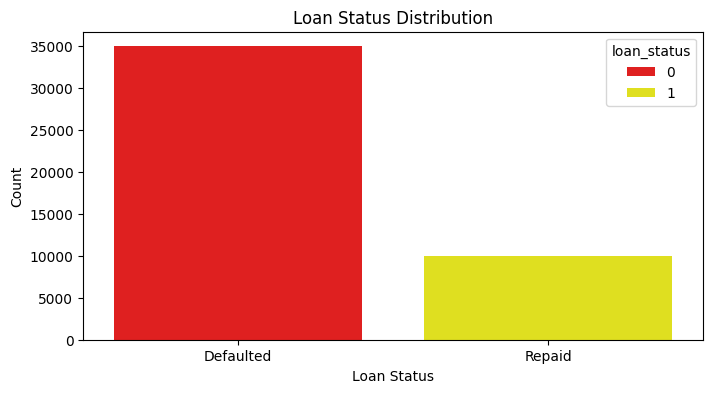

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='loan_status', hue='loan_status', palette=['red', 'yellow'])


plt.xticks([0, 1], ['Defaulted', 'Repaid'])

plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.title("Loan Status Distribution")
plt.show()



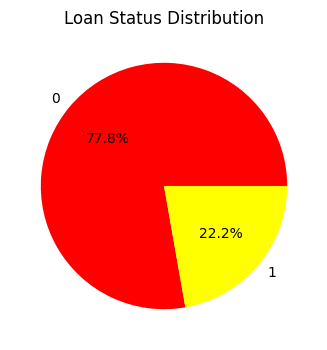

In [ ]:
plt.figure(figsize=(8, 4))
plt.pie(df['loan_status'].value_counts(), labels=[0,1],colors=["red","yellow"], autopct='%1.1f%%')
plt.title('Loan Status Distribution')
plt.show()

The data is distributed as follows: 77.8% for category zero, while 22.2% was distributed for category 1. In other words, the percentage of people who do not pay their debts is very high.

### Distribution of numerical data

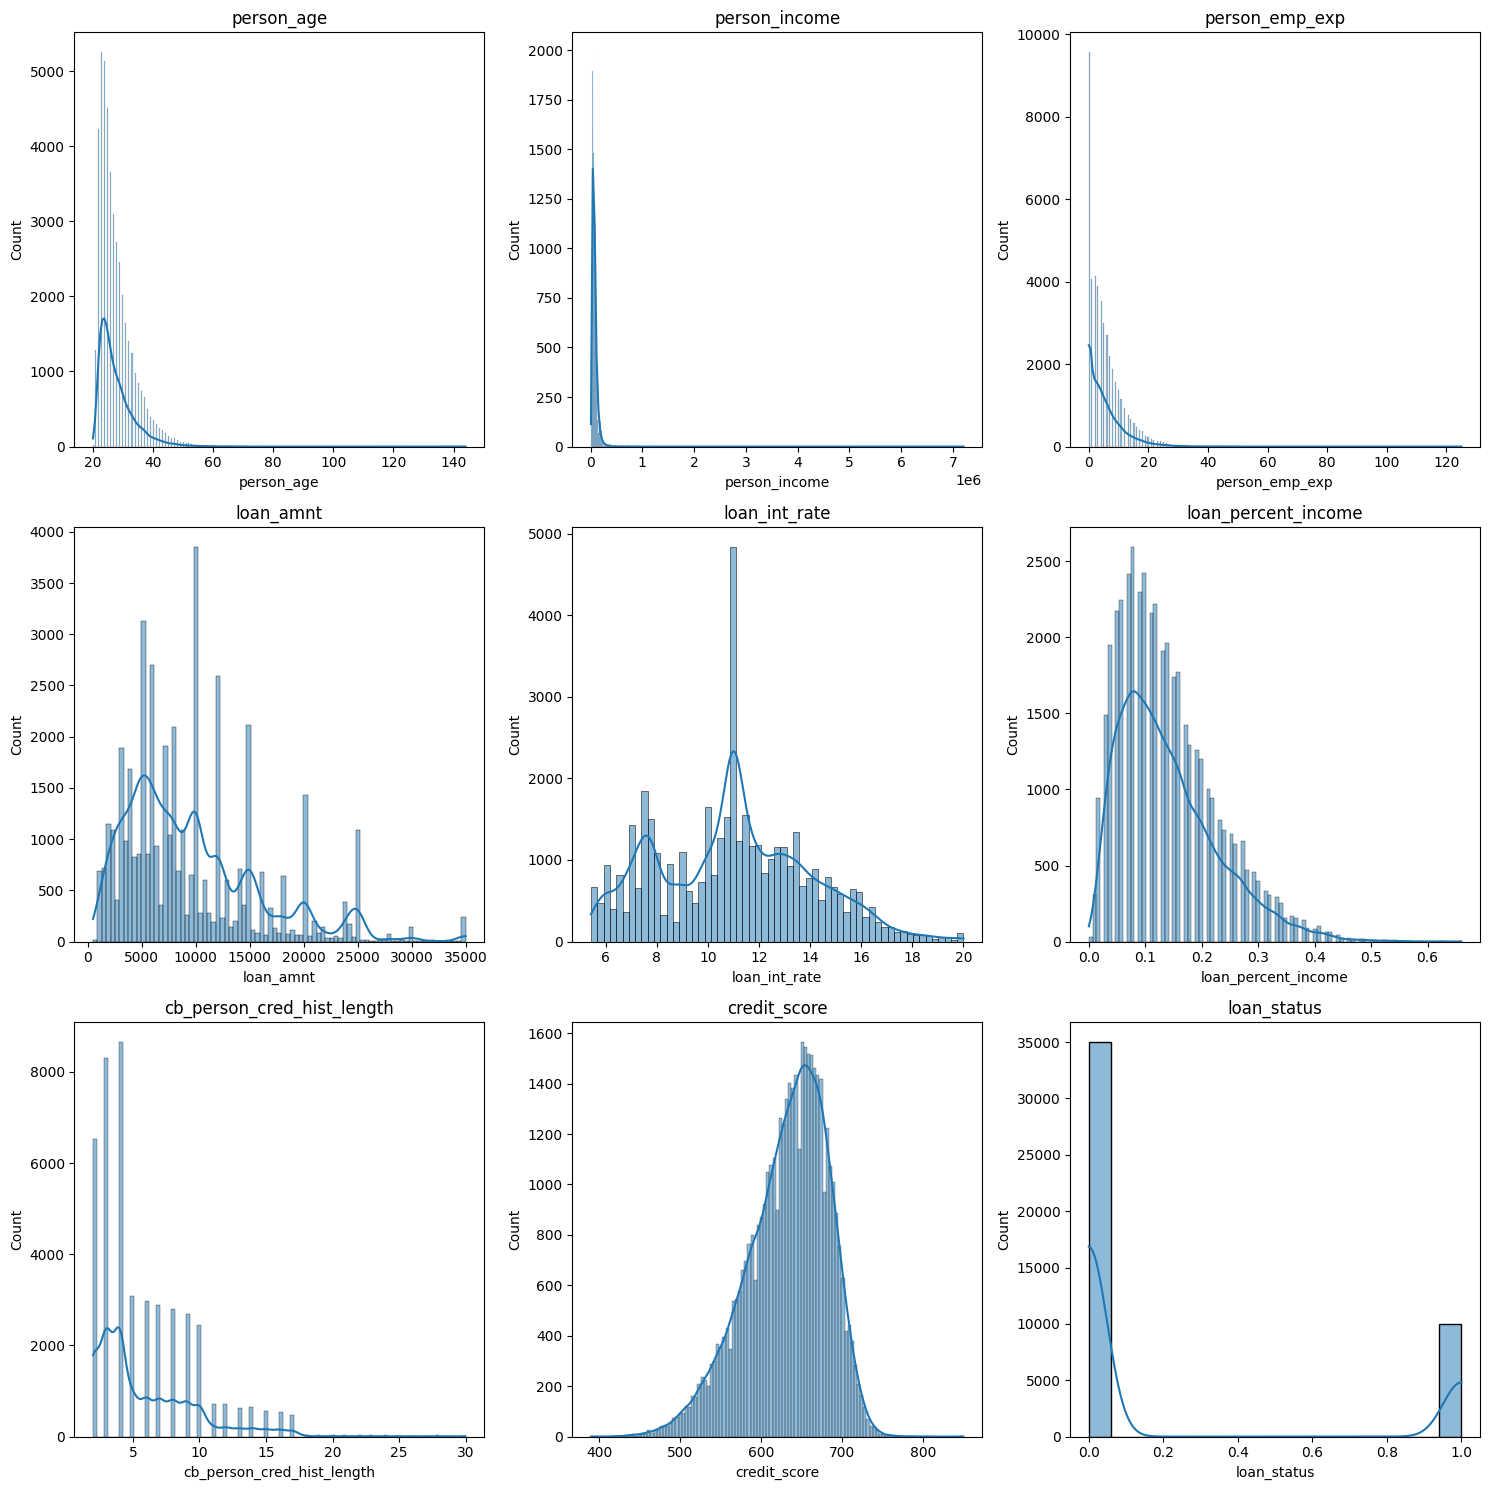

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import integer, float64

cols = df.select_dtypes(include=[integer, float64]).columns

plt.figure(figsize=(15, 15)) # Increased figure size for 3x3 plots

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i) # Changed grid to 3 rows, 3 columns
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

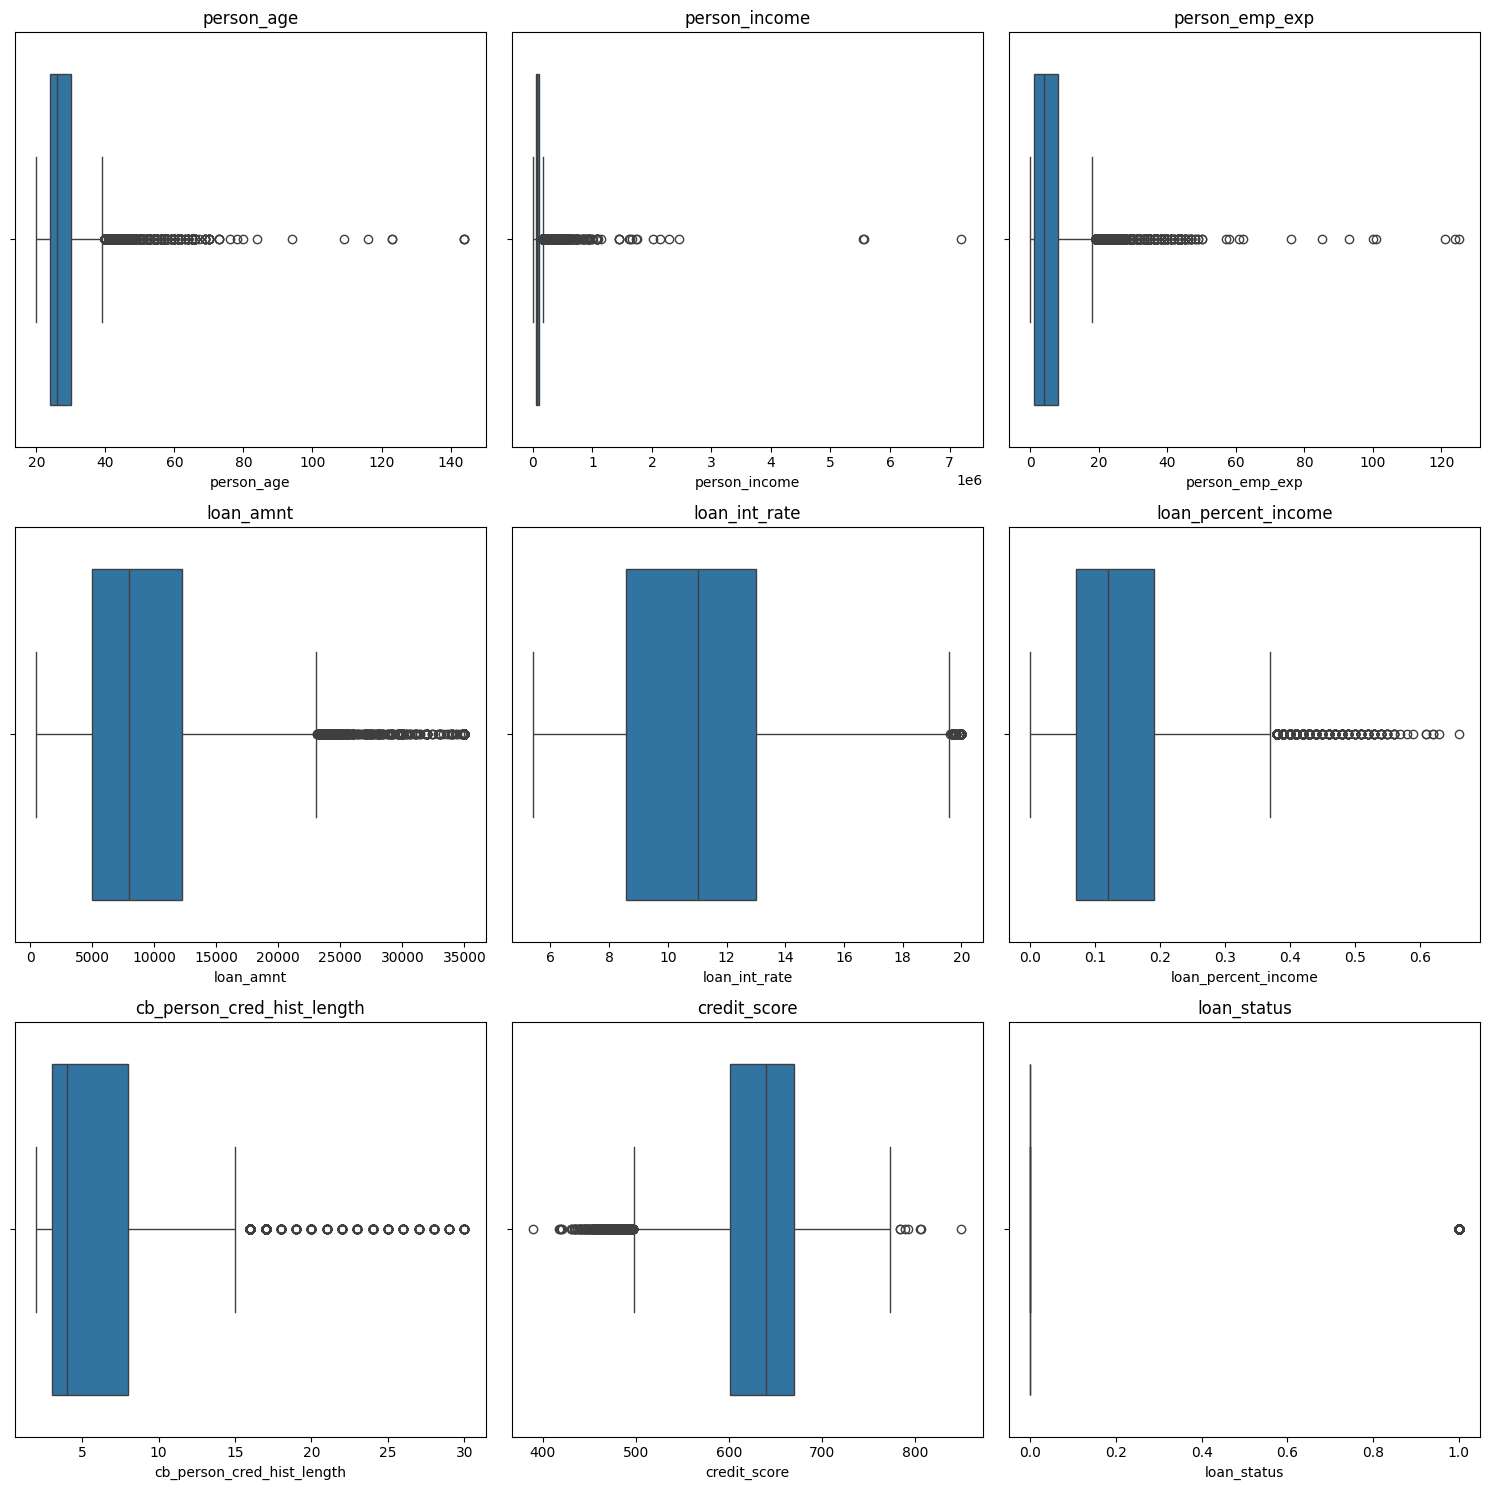

In [ ]:
cols = df.select_dtypes(include=[integer,float64]).columns

plt.figure(figsize=(15, 15))

for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

Distribution and Outlier Analysis

After examining the distribution plots and boxplots for the numerical features, we observed the following:

* Several columns showed **noticeable skewness**, indicating that the data is not symmetrically distributed.  
* Some features exhibited **strong (high) skew**, where the values are heavily concentrated toward one side of the distribution.  
* The boxplots also revealed the presence of **multiple outliers** in a number of numerical columns, suggesting extreme values that deviate significantly from the majority of the data.  
* These observations confirm that the dataset contains **skewed distributions and outliers**, which may affect model performance and might require appropriate preprocessing techniques such as transformation or outlier handling.



### Categorical data distribution

/tmp/ipython-input-1516672866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-1516672866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-1516672866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/tmp/ipython-input-1516672866.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False

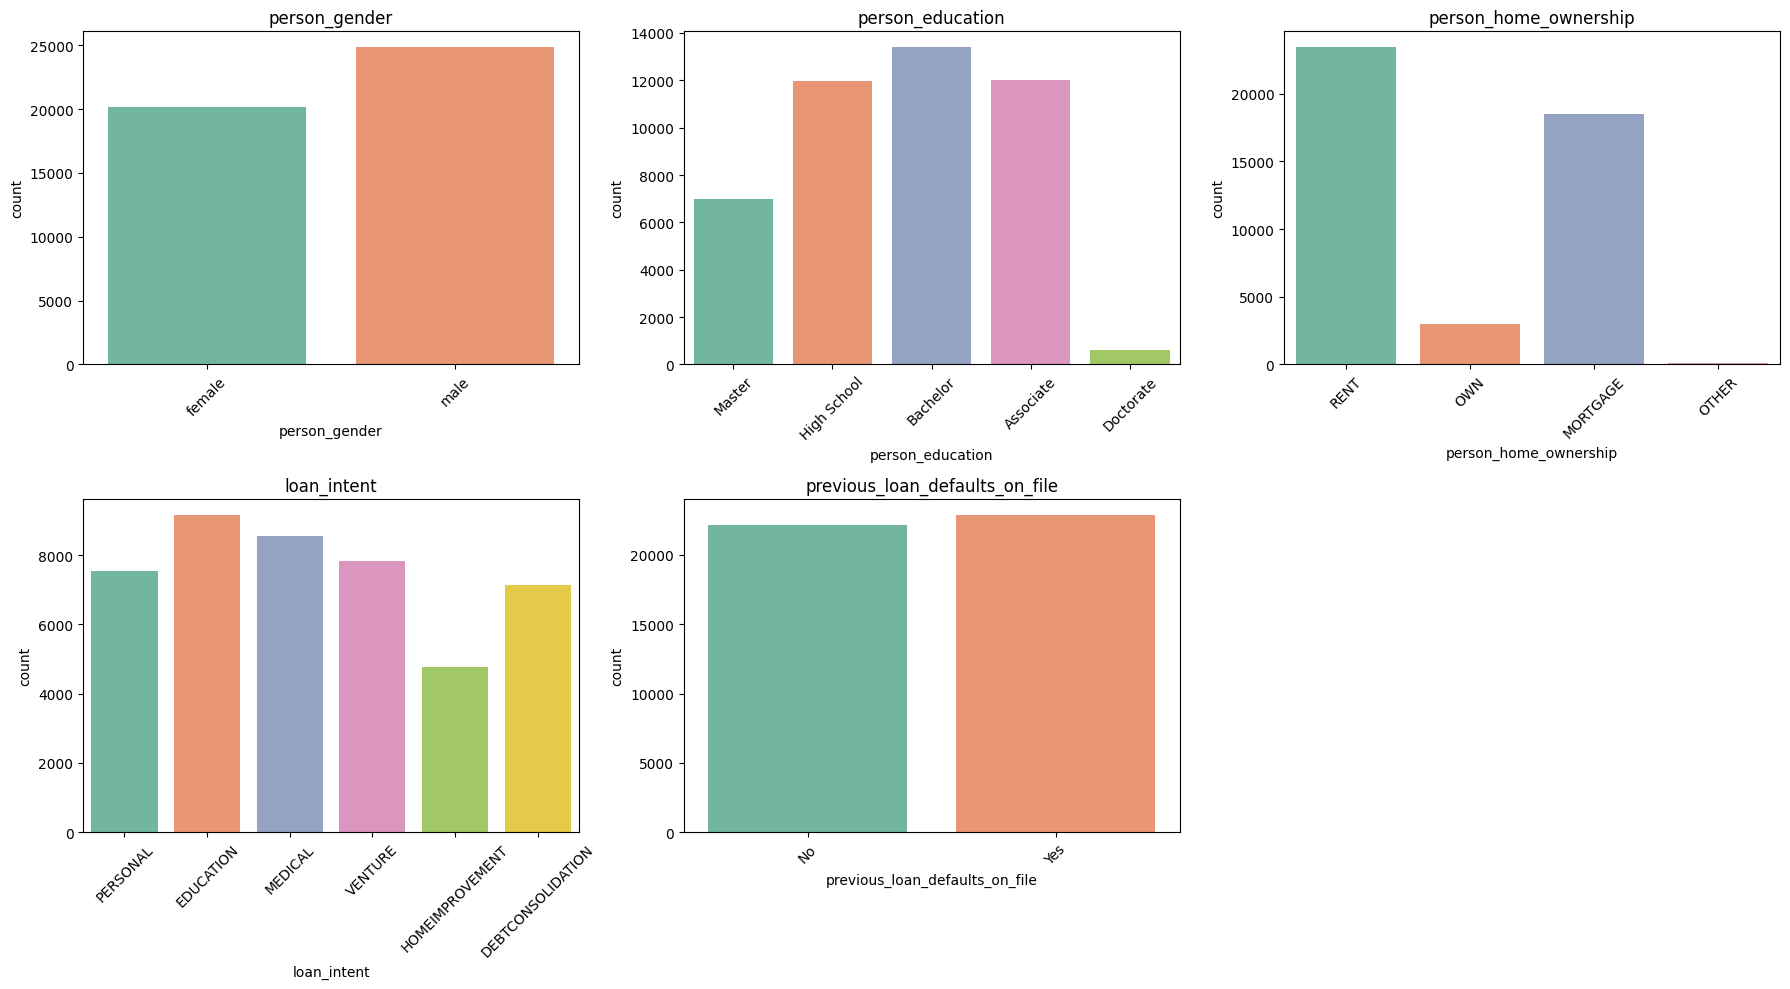

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cat_cols = df.select_dtypes(include=["object","string"]).columns

plt.figure(figsize=(18, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(col)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()


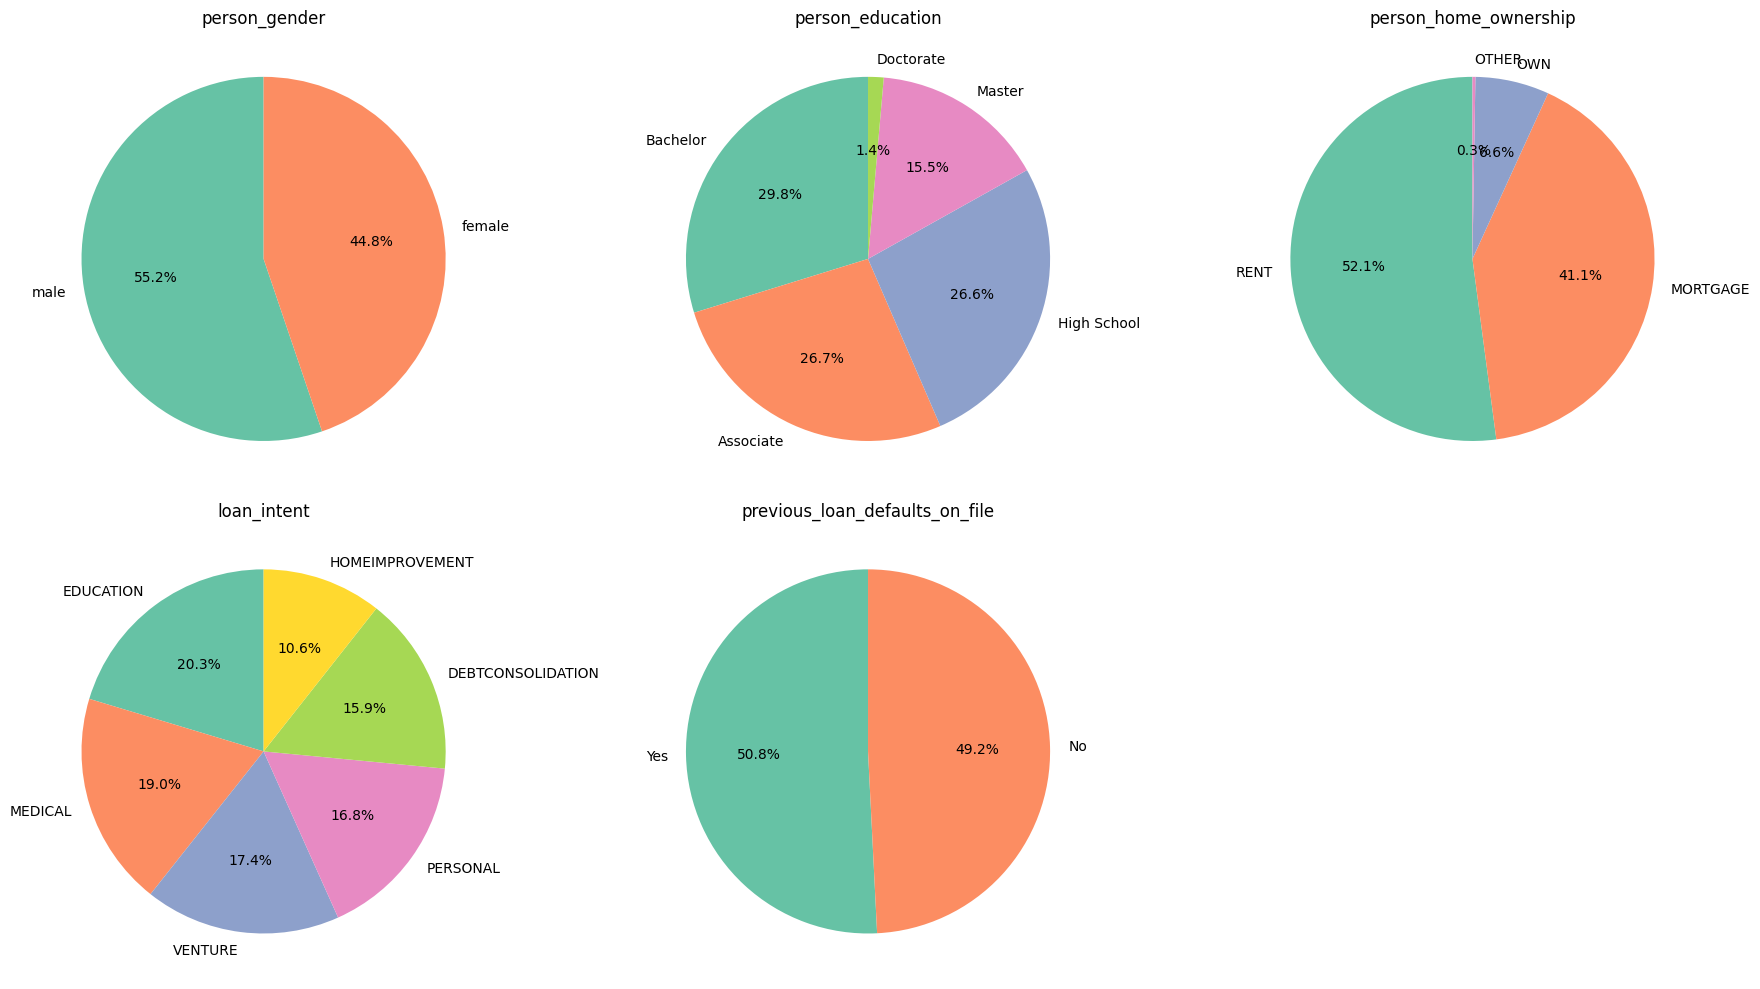

In [ ]:
import matplotlib.pyplot as plt

# الأعمدة النصية
cat_cols = df.select_dtypes(include=['object', 'category']).columns

plt.figure(figsize=(18, 10))

for i, col in enumerate(cat_cols, 1):
    plt.subplot(2, 3, i)
    counts = df[col].value_counts()

    plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Set2.colors)
    plt.title(col)


plt.tight_layout()
plt.show()


Categorical Feature Summary:

person_gender: Male 55.2%, Female 44.8%. There is a relatively balanced distribution between genders, with males slightly more.

person_education: Bachelor 29.8%, Associate 26.7%, High School 26.6%, Master 15.5%, Doctorate 1.4%. Most individuals have a Bachelor’s degree or lower, while a smaller portion hold a Master’s or Doctorate.

person_home_ownership: Rent 52.1%, Mortgage 41.1%, Own 6.6%, Other 0.3%. Most people either rent or have a mortgage; few fully own their homes.

loan_intent: Education 20.3%, Medical 19%, Venture 17.4%, Personal 16.8%, Debt Consolidation 15.9%, Home Improvement 10.6%. Loan purposes are diverse, with Education and Medical being most common.

previous_loan_defaults_on_file: Yes 50.8%, No 49.2%. Nearly balanced between those who defaulted before and those who did not.

### Does gender affect loan status?

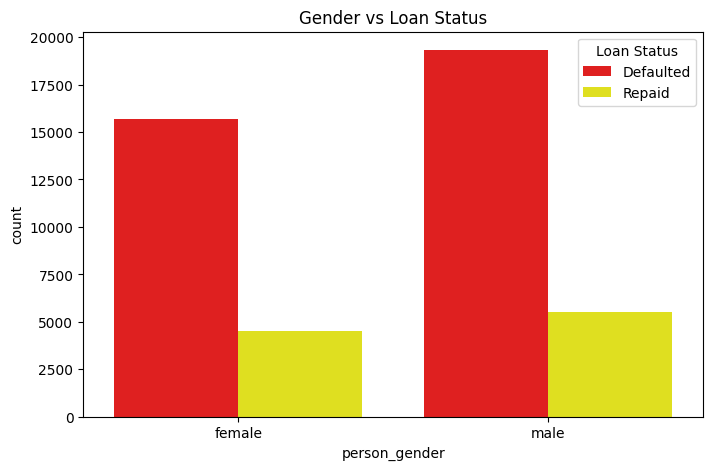

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.countplot(x='person_gender', hue='loan_status', data=df, palette=['red','yellow'])
plt.legend(title='Loan Status', labels=['Defaulted', 'Repaid'])
plt.title("Gender vs Loan Status")
plt.show()


Both males and females have a much higher count of defaulted loans compared to repaid loans.

Males have slightly higher counts in both defaulted and repaid categories compared to females.

The ratio of defaulted to repaid is roughly similar for both genders, suggesting gender might not be a strong factor affecting loan repayment in this dataset.

### Does age and income affect loan status?

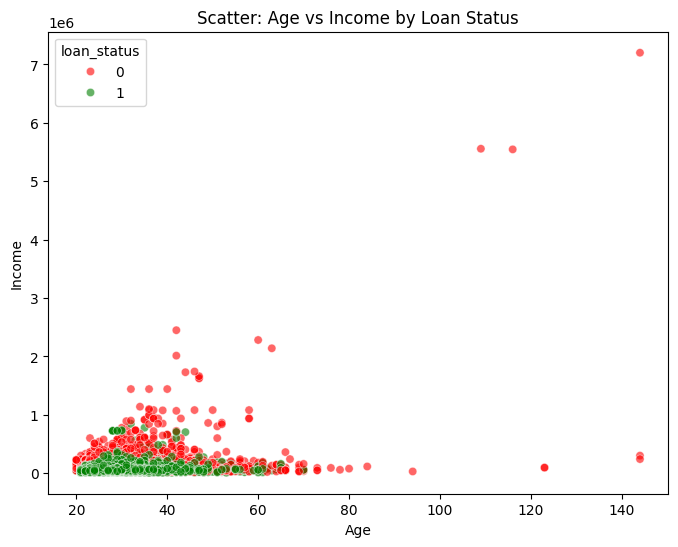

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='person_age', y='person_income', hue='loan_status', palette=['red','green'], alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Income")

plt.title("Scatter: Age vs Income by Loan Status")
plt.show()


Most data points are concentrated in the age range 20–60 and income range 0–500,000.

Loan defaulters (green) and non-defaulters (red) largely overlap in this common range.

There are some extreme outliers:

Very high incomes above 5 million, mostly non-defaulters.

Some very high ages (above 100) which might be data entry errors.

Insights:

No clear trend or separation is visible between defaulters and non-defaulters based solely on age and income.

Extreme values (outliers) may distort the overall interpretation.

Age and income alone may not strongly predict loan default, so other features should be considered for modeling.

### Data Exploration & Distribution Summary

## **1. Dataset Overview**

* **Rows:** 45,000
* **Columns:** 14
* No missing values.
* Target variable (`loan_status`) is **imbalanced**: 78% non-defaulters, 22% defaulters.

---

## **2. Feature Types**

* **Numerical (9):** `person_age`, `person_income`, `person_emp_exp`, `loan_amnt`, `loan_int_rate`, `loan_percent_income`, `cb_person_cred_hist_length`, `credit_score`
* **Categorical (5):** `person_gender`, `person_education`, `person_home_ownership`, `loan_intent`, `previous_loan_defaults_on_file`

---

## **3. Key Observations**

### **Numerical Features**

* Most features are **right-skewed**, especially `person_income` and `loan_amnt`.
* **Outliers** exist in:

  * `person_income` (up to 7,200,766)
  * `person_emp_exp` (up to 125)
  * `loan_amnt` (up to 35,000)
  * `cb_person_cred_hist_length` (up to 30)
  * `person_age` (144)


---

## **4. Data Quality Insights**

* Data is mostly clean (no missing values).
* Strong outliers and skewed distributions need **treatment** before modeling.
* Target imbalance requires **resampling** or **class weighting**.

---

## **5. Overall Summary**

* Large and clean dataset but with **outliers and skewness** in key numerical features.
* Suitable for scaling and transformation (StandardScaler, RobustScaler, PowerTransformer).
* After proper preprocessing, the data is ready for modeling and analysis.

# DATA_PROCESS

In [ ]:

text_cols = df.select_dtypes(include=['object', 'string']).columns
df_numarical = df.drop(columns=text_cols)
df_text = df[text_cols]



In [ ]:
from sklearn.ensemble import IsolationForest
from scipy.stats import zscore
import pandas as pd

num_cols_df = df_numarical.drop(columns=['loan_status'])

outlier_comparison = []

# إعداد نموذج Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(num_cols_df)

iso_preds = iso_forest.predict(num_cols_df)


for col in num_cols_df.columns: # Iterate over the column names of the feature DataFrame

    # ---- IQR ----
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers_iqr = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()

    # ---- Z-score ----
    z_scores = zscore(df[col])
    outliers_z = ((z_scores > 3) | (z_scores < -3)).sum()

    # ---- Isolation Forest ----

    total_iso_outliers = (iso_preds == -1).sum()

    outlier_comparison.append({
        'Column': col,
        'Outliers_IQR': outliers_iqr,
        'Outliers_Zscore': outliers_z,
        'Outliers_ISO': total_iso_outliers
    })

df_outlier_comparison = pd.DataFrame(outlier_comparison)
df_outlier_comparison

Column  Outliers_IQR  Outliers_Zscore  Outliers_ISO
0                  person_age          2188              762           450
1               person_income          2218              286           450
2              person_emp_exp          1724              741           450
3                   loan_amnt          2348              448           450
4               loan_int_rate           124               84           450
5         loan_percent_income           744              431           450
6  cb_person_cred_hist_length          1366              355           450
7                credit_score           467              236           450

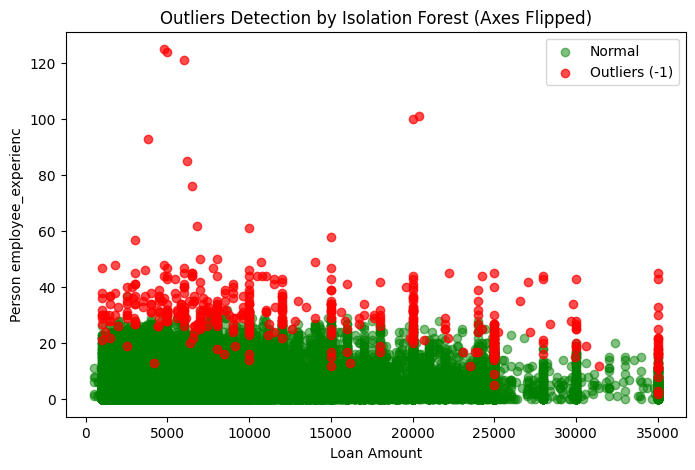

In [ ]:
plt.figure(figsize=(8,5))

# الصفوف الطبيعية
plt.scatter(df[iso_preds == 1]['loan_amnt'],  # الآن Y القديم صار X
            df[iso_preds == 1]['person_emp_exp'],  # الآن X القديم صار Y
            color='green', alpha=0.5, label='Normal')

# الصفوف الشاذة
plt.scatter(df[iso_preds == -1]['loan_amnt'],
            df[iso_preds == -1]['person_emp_exp'],
            color='red', alpha=0.7, label='Outliers (-1)')

plt.xlabel('Loan Amount')       # المحور الجديد X
plt.ylabel('Person employee_experienc')
plt.title('Outliers Detection by Isolation Forest (Axes Flipped)')
plt.legend()
plt.show()


In [ ]:
df_copy= df.copy()


In [ ]:
num_cols = num_cols_df.columns
for col in num_cols:
    df.loc[iso_preds == -1, col] = pd.NA


In [ ]:
df.describe()

person_age  person_income  person_emp_exp     loan_amnt  \
count  44550.000000   4.455000e+04    44550.000000  44550.000000   
mean      27.501841   7.872279e+04        5.148507   9539.486285   
std        5.319160   5.325904e+04        5.334768   6259.697478   
min       20.000000   8.000000e+03        0.000000    500.000000   
25%       24.000000   4.709150e+04        1.000000   5000.000000   
50%       26.000000   6.700300e+04        4.000000   8000.000000   
75%       30.000000   9.515350e+04        8.000000  12012.750000   
max       57.000000   1.440982e+06       37.000000  35000.000000   

       loan_int_rate  loan_percent_income  cb_person_cred_hist_length  \
count   44550.000000         44550.000000                44550.000000   
mean       10.998416             0.139672                    5.716476   
std         2.972157             0.086889                    3.547688   
min         5.420000             0.000000                    2.000000   
25%         8.590000             0.070000                    3.000000   
50%        11.010000             0.120000                    4.000000   
75%        12.990000             0.190000                    8.000000   
max        20.000000             0.660000                   29.000000   

       credit_score   loan_status  
count  44550.000000  45000.000000  
mean     632.251425      0.222222  
std       50.187721      0.415744  
min      390.000000      0.000000  
25%      601.000000      0.000000  
50%      639.000000      0.000000  
75%      669.000000      0.000000  
max      768.000000      1.000000

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      44550 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   44550 non-null  float64
 4   person_emp_exp                  44550 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       44550 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   44550 non-null  float64
 9   loan_percent_income             44550 non-null  float64
 10  cb_person_cred_hist_length      44550 non-null  float64
 11  credit_score                    44550 non-null  float64
 12  previous_loan_defaults_on_file  

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

numeric_cols = df.select_dtypes(include=['number']).columns

list_num_nul = []
knn_feature = pd.DataFrame()


for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        list_num_nul.append(col)
    else:
        knn_feature[col] = df[col]


df_null = df[list_num_nul].copy()


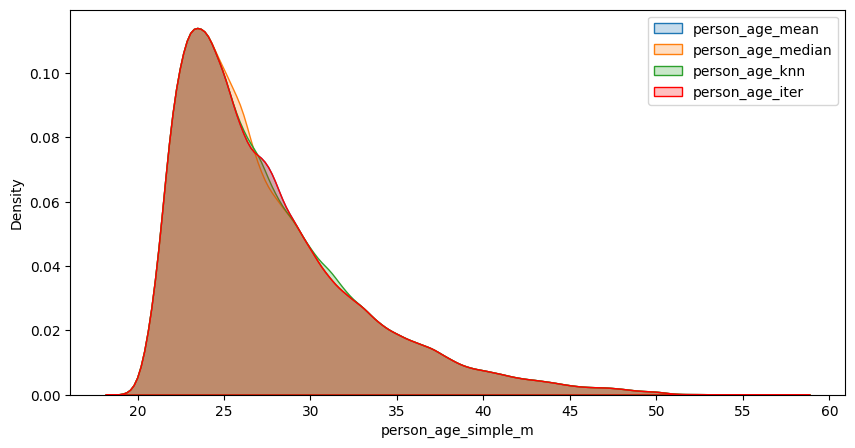

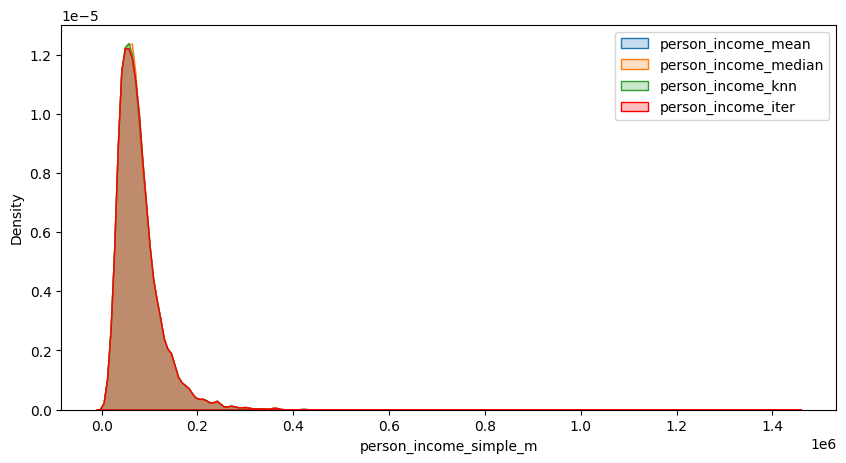

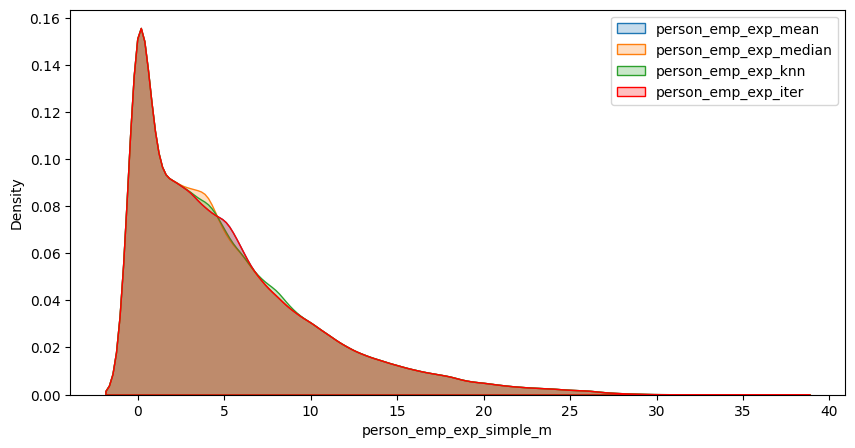

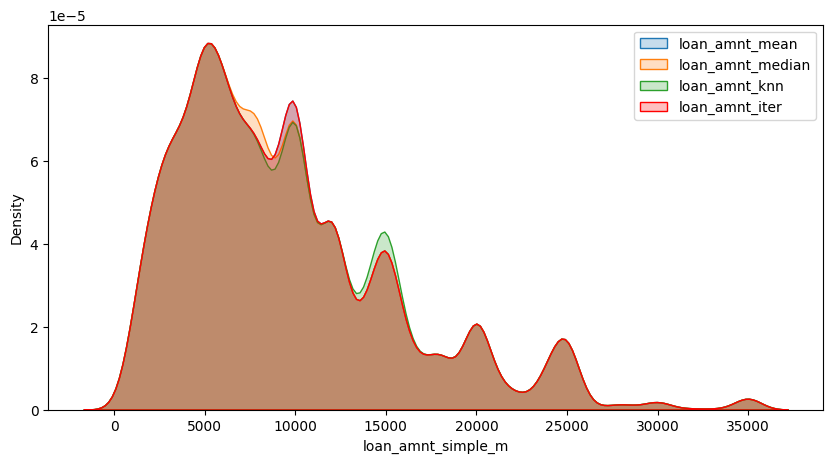

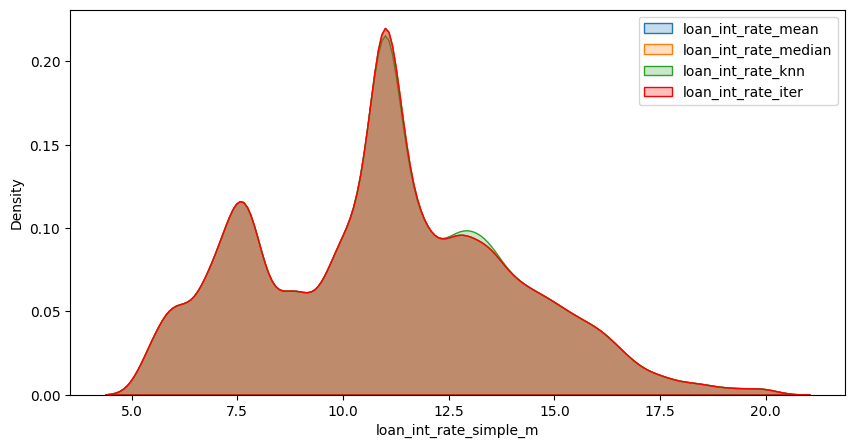

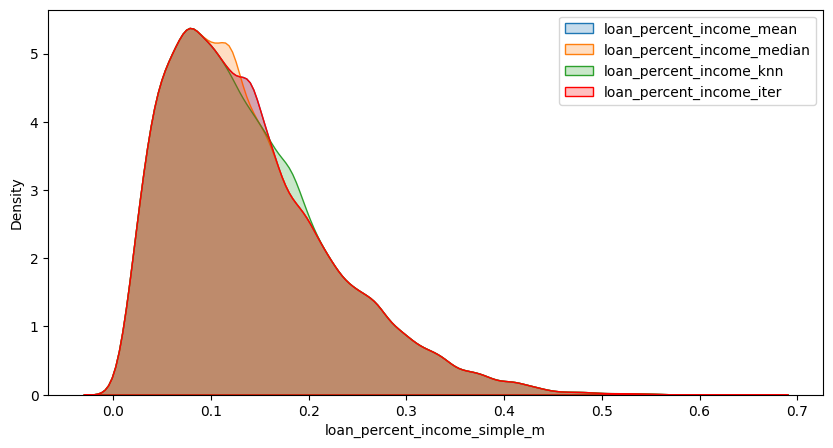

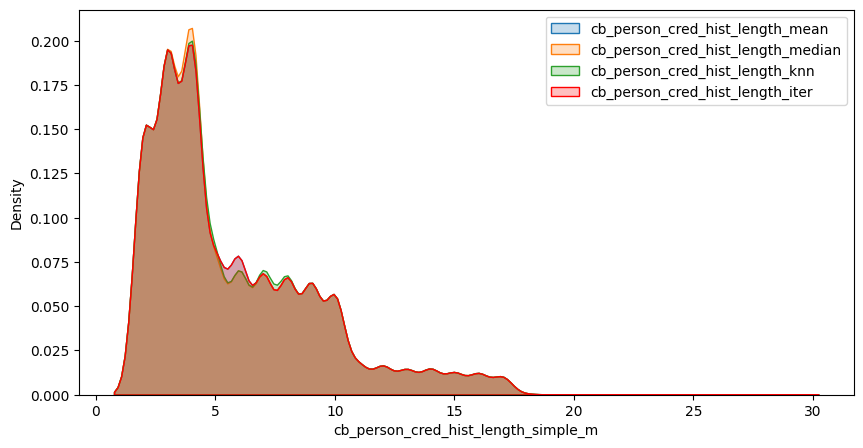

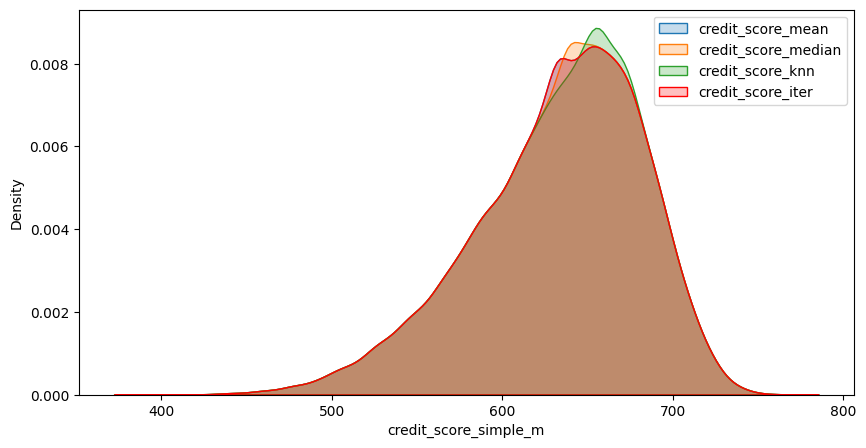

In [ ]:


for col in list_num_nul:

    df_null[f"{col}_simple_m"] = SimpleImputer(strategy='mean').fit_transform(df[[col]])
    df_null[f"{col}_median_m"] = SimpleImputer(strategy='median').fit_transform(df[[col]])

    temp_df = pd.concat([df[[col]], knn_feature], axis=1)
    knn_imputed = KNNImputer(n_neighbors=5).fit_transform(temp_df)
    df_null[f"{col}_knn"] = knn_imputed[:, 0]

    iter_imputed = IterativeImputer(random_state=42, max_iter=10).fit_transform(df[[col]])
    df_null[f"{col}_iter"] = iter_imputed[:, 0]

    plt.figure(figsize=(10,5))
    sns.kdeplot(df_null[f"{col}_simple_m"], label=f"{col}_mean", fill=True)
    sns.kdeplot(df_null[f"{col}_median_m"], label=f"{col}_median", fill=True)
    sns.kdeplot(df_null[f"{col}_knn"], label=f"{col}_knn", fill=True)
    sns.kdeplot(df_null[f"{col}_iter"], label=f"{col}_iter", color="red",fill=True)
    plt.legend()
    plt.show()


In [ ]:
for col in df:
   if col in list_num_nul:
    df[col] = df_null[f"{col}_iter"]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  float64
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  float64
 12  previous_loan_defaults_on_file  

## **Outlier Detection and Imputation Summary**

This section covers the entire workflow of detecting and handling outliers in the numerical features of the dataset. Three different outlier detection methods were applied, followed by missing value imputation to correct the affected data points.

---

## **1. Outlier Detection Methods Used**

Three statistical and machine-learning-based methods were applied to identify outliers:

### **1.1 Interquartile Range (IQR)**

* Calculates Q1 and Q3 for each numerical column.
* Defines outliers as any value below:
  **Q1 − 1.5 × IQR**
  or above:
  **Q3 + 1.5 × IQR**.
* Captures extreme values but can be sensitive to skewed data.

---

### **1.2 Z-Score Method**

* Measures how many standard deviations a value is from the mean.
* Values with **|z| > 3** are considered outliers.
* Best for normally distributed data.

---

### **1.3 Isolation Forest**

* An unsupervised ML algorithm designed to isolate anomalies.
* Works well with non-linear distributions and high-dimensional data.
* A contamination level of **1%** was used.
* Labels outliers as **−1** and normal points as **1**.
* The total number of Isolation Forest outliers was **450 rows**.

---

## **2. Outlier Comparison Summary**

A comparison table was generated containing the number of detected outliers from each method for each numerical column.
This comparison helps understand which columns are more prone to anomalies and how consistent the methods are.

---

## **3. Visualization of Outliers**

A scatter plot was drawn using:

* **Loan Amount** on the x-axis
* **Employment Experience** on the y-axis

Outliers detected by Isolation Forest were highlighted in red, while normal points were shown in green.
This visualization provided a clear separation between normal and anomalous values.

---

## **4. Handling Outliers**

Instead of deleting rows, all Isolation Forest outliers were replaced with **missing values (NA)** in every numerical column.
This preserves the dataset size while allowing for smarter correction using imputation.

---

## **5. Missing Data Imputation**

Four imputation methods were applied to the columns containing missing values:

### **5.1 Mean Imputation**

* Replaces missing values with the column mean.

### **5.2 Median Imputation**

* Replaces missing values with the column median.
* More robust when the data is skewed.

### **5.3 KNN Imputation**

* Uses K-Nearest Neighbors (k=5).
* Fills missing values based on similarity with other observations.

### **5.4 Iterative Imputation**

* A predictive modeling approach.
* Each feature with missing values is modeled as a function of other features.
* Produces the most realistic replacement values.

---

## **6. KDE Comparison of Imputation Methods**

A KDE (Kernel Density Estimation) plot was generated for each column showing the distribution after:

* Mean imputation
* Median imputation
* KNN imputation
* Iterative imputation

This allowed visual comparison of which method best maintains the original data distribution.

---

## **7. Final Selected Imputation Method**

After comparing distributions, **Iterative Imputation** was chosen as the final method because it:

* Preserves the natural shape of the feature distribution.
* Handles complex relationships between features.
* Produces the most stable and realistic values.

All numerical columns with missing values were therefore replaced using **Iterative Imputer**.

---

## **Final Result**

* Outliers were identified using three robust methods.
* Isolation Forest outliers were handled through imputation rather than deletion.
* Iterative Imputation was selected as the final strategy.
* The numerical dataset is now clean, consistent, and ready for scaling and model training.


# FEATURE_ENGINEERING

In [ ]:
df.head()

person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0             0.0   
1        21.0        female      High School        12282.0             0.0   
2        25.0        female      High School        12438.0             3.0   
3        23.0        female         Bachelor        79753.0             0.0   
4        24.0          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0                 0.49                         3.0         561.0   
1                 0.08                         2.0         504.0   
2                 0.44                         3.0         635.0   
3                 0.44                         2.0         675.0   
4                 0.53                         4.0         586.0   

  previous_loan_defaults_on_file  loan_status  
0                             No            1  
1                            Yes            0  
2                             No            1  
3                             No            1  
4                             No            1

In [ ]:
df['person_education'].value_counts()

person_education
Bachelor       13399
Associate      12028
High School    11972
Master          6980
Doctorate        621
Name: count, dtype: int64

In [ ]:
import pandas as pd
import numpy as np

#  Age Groups

df["age_group"] = pd.cut(
    df["person_age"],
    bins=[17, 25, 35, 45, 55, 100],
    labels=["18-25", "26-35", "36-45", "46-55", "56+"]
)

#  Debt-to-Income Ratio
df["debt_to_income"] = df["loan_amnt"] / df["person_income"]


#  Credit Age Ratio

df["credit_age_ratio"] = df["cb_person_cred_hist_length"] / df["person_age"]


# Loan Risk Score

df["loan_risk_score"] = df["loan_int_rate"] * df["loan_percent_income"]

#  High Education Binary

high_levels = ["Bachelor", "Master", "Doctorate"]
df["high_edu"] = df["person_education"].isin(high_levels).astype(int)


#  Previous Defaults Flag

df["prev_default_flag"] = df["previous_loan_defaults_on_file"].map({"Yes": 1, "No": 0})


#  Monthly Income + Ratio
df["monthly_income"] = df["person_income"] / 12
df["loan_to_month_income"] = df["loan_amnt"] / df["monthly_income"]
df = df.drop(columns=["previous_loan_defaults_on_file"])
df.head()


person_age person_gender person_education  person_income  person_emp_exp  \
0        22.0        female           Master        71948.0             0.0   
1        21.0        female      High School        12282.0             0.0   
2        25.0        female      High School        12438.0             3.0   
3        23.0        female         Bachelor        79753.0             0.0   
4        24.0          male           Master        66135.0             1.0   

  person_home_ownership  loan_amnt loan_intent  loan_int_rate  \
0                  RENT    35000.0    PERSONAL          16.02   
1                   OWN     1000.0   EDUCATION          11.14   
2              MORTGAGE     5500.0     MEDICAL          12.87   
3                  RENT    35000.0     MEDICAL          15.23   
4                  RENT    35000.0     MEDICAL          14.27   

   loan_percent_income  ...  credit_score  loan_status  age_group  \
0                 0.49  ...         561.0            1      18-25   
1                 0.08  ...         504.0            0      18-25   
2                 0.44  ...         635.0            1      18-25   
3                 0.44  ...         675.0            1      18-25   
4                 0.53  ...         586.0            1      18-25   

  debt_to_income  credit_age_ratio  loan_risk_score  high_edu  \
0       0.486462          0.136364           7.8498         1   
1       0.081420          0.095238           0.8912         0   
2       0.442193          0.120000           5.6628         0   
3       0.438855          0.086957           6.7012         1   
4       0.529221          0.166667           7.5631         1   

   prev_default_flag  monthly_income  loan_to_month_income  
0                  0     5995.666667              5.837549  
1                  1     1023.500000              0.977040  
2                  0     1036.500000              5.306319  
3                  0     6646.083333              5.266260  
4                  0     5511.250000              6.350646  

[5 rows x 21 columns]

In [ ]:
print(df["loan_intent"].value_counts())
print(df.groupby("loan_intent")["loan_status"].mean())


loan_intent
EDUCATION            9153
MEDICAL              8548
VENTURE              7819
PERSONAL             7552
DEBTCONSOLIDATION    7145
HOMEIMPROVEMENT      4783
Name: count, dtype: int64
loan_intent
DEBTCONSOLIDATION    0.302729
EDUCATION            0.169562
HOMEIMPROVEMENT      0.263015
MEDICAL              0.278194
PERSONAL             0.201404
VENTURE              0.144264
Name: loan_status, dtype: float64


In [ ]:

intent_risk_map = {
    "DEBTCONSOLIDATION": 0.302729,
    "MEDICAL": 0.278194,
    "HOMEIMPROVEMENT": 0.263015,
    "PERSONAL": 0.201404,
    "EDUCATION": 0.169562,
    "VENTURE": 0.144264
}


df["intent_risk_score"] = df["loan_intent"].map(intent_risk_map)


## **Feature Engineering Summary**

In this section, several new features were engineered to enhance the predictive performance of the loan default model. These features capture financial ratios, customer demographics, credit behavior, and loan-related risks. Below is a summary of all created features and their purposes.



## **1. Age Group**

Customers were grouped into five age categories instead of using raw age values. This helps the model learn patterns associated with different age segments:

* 18–25
* 26–35
* 36–45
* 46–55
* 56+

---

## **2. Debt-to-Income Ratio**

This feature represents how much of the applicant’s income is required to cover the loan amount.
Higher values indicate a higher financial burden and an increased risk of default.

---

## **3. Credit Age Ratio**

This feature measures the share of a person's life spent using credit.
A longer credit history relative to age often indicates more financial maturity and reliability.

---

## **4. Loan Risk Score**

A combined metric that multiplies the loan interest rate by the loan-to-income percentage.
It reflects how “risky” the structure of the loan is — higher scores imply higher risk.

---

## **5. High Education Indicator**

A binary variable indicating whether the applicant holds a high-level educational degree (Bachelor, Master, or Doctorate).
Applicants with higher education levels often show more stable financial behavior.

---

## **6. Previous Defaults Flag**

A binary indicator showing whether the applicant previously defaulted on any loan.
This feature is typically one of the strongest predictors of future defaults.

---

## **7. Monthly Income and Loan-to-Monthly-Income Ratio**

* Monthly income was derived from annual income.
* A ratio was created to measure how affordable the loan is relative to monthly earnings.
  This helps quantify the applicant’s financial capacity.

---

## **8. Loan Intent Risk Score**

Each loan purpose (e.g., Medical, Personal, Education) was replaced with its actual default rate in the dataset.
This provides the model with a meaningful numeric representation of risk associated with each loan intent.

# SCALLING

In [ ]:
from sklearn.preprocessing import StandardScaler,RobustScaler,PowerTransformer

df_standard= df.copy()
numarical=df.select_dtypes(include=['number']).columns

df_standard_scaled = df_standard.copy()
df_robust_scaled = df_standard.copy()
df_power_scaled = df_standard.copy()

scaler_stand = StandardScaler()
scaler_robust = RobustScaler()
scaler_power = PowerTransformer()


# -------------------------
# StandardScaler
df_standard_scaled[numarical] = scaler_stand.fit_transform(df_standard_scaled[numarical])

# RobustScaler
df_robust_scaled[numarical] = scaler_robust.fit_transform(df_robust_scaled[numarical])

# PowerTransformer (Yeo-Johnson يدعم الصفر والسالب)
df_power_scaled[numarical] = scaler_power.fit_transform(df_power_scaled[numarical])




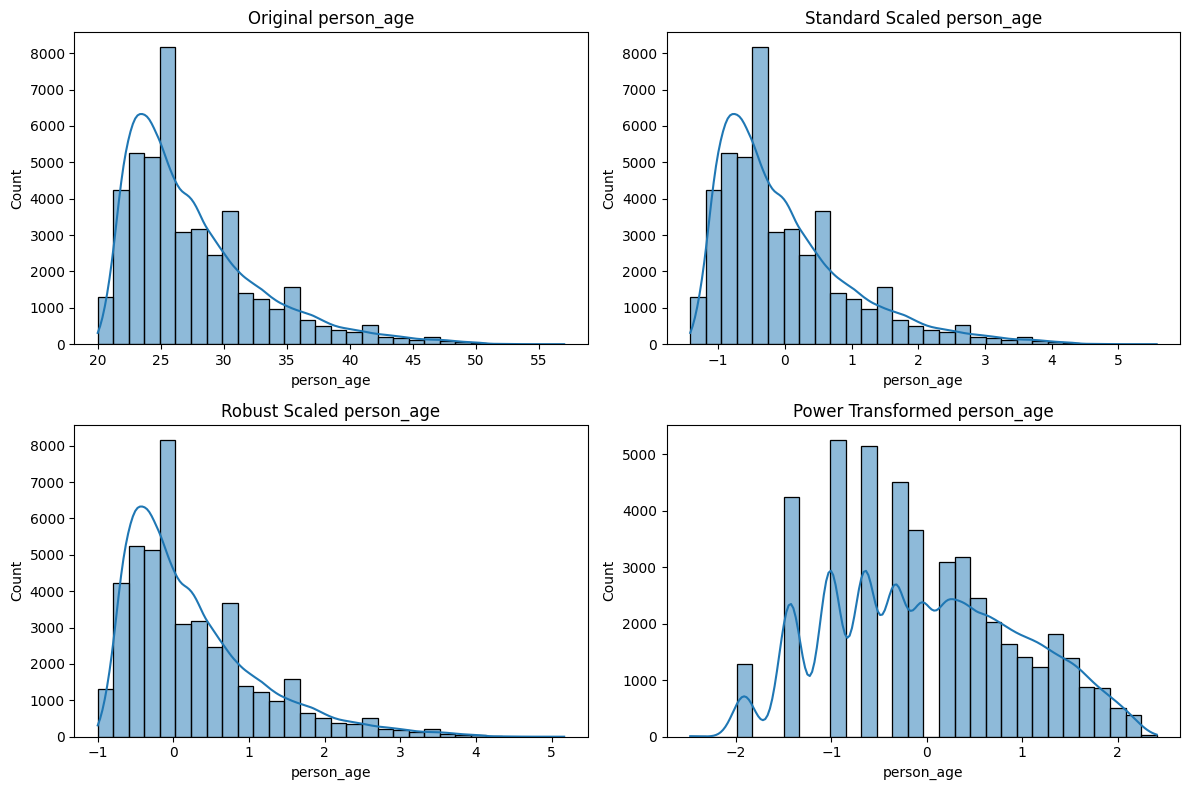

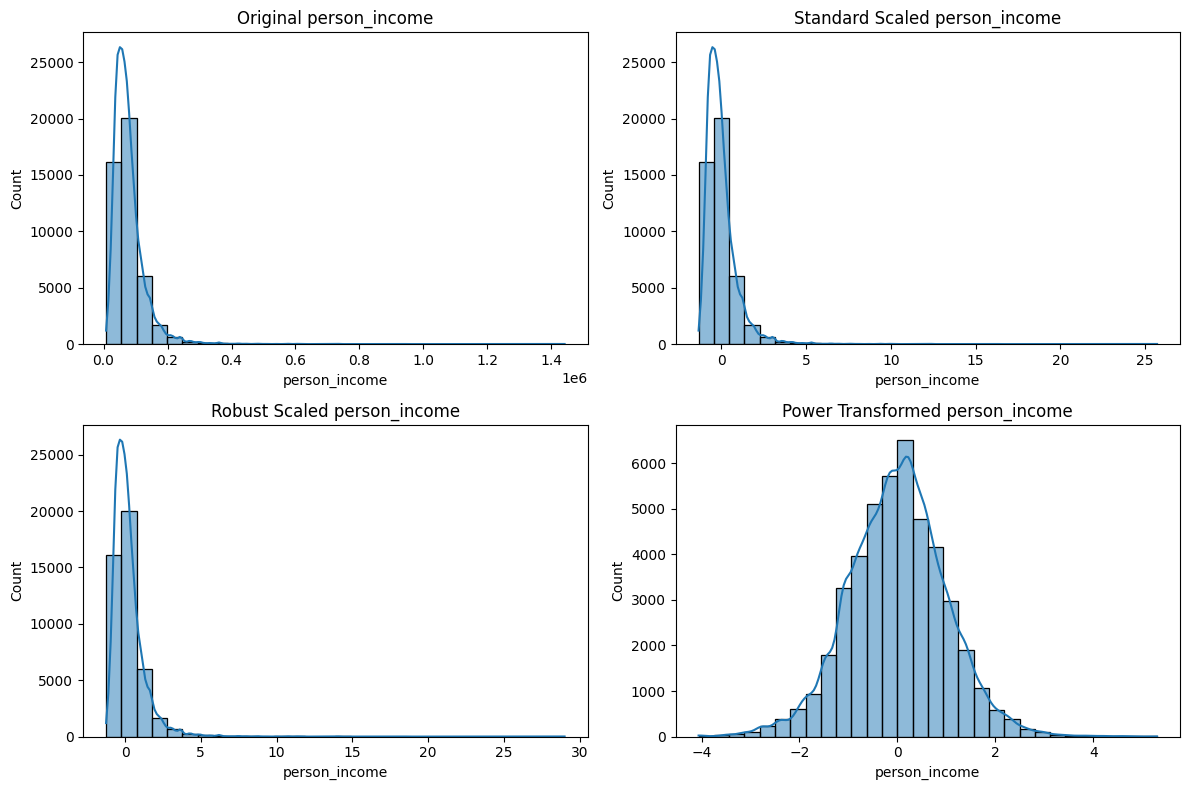

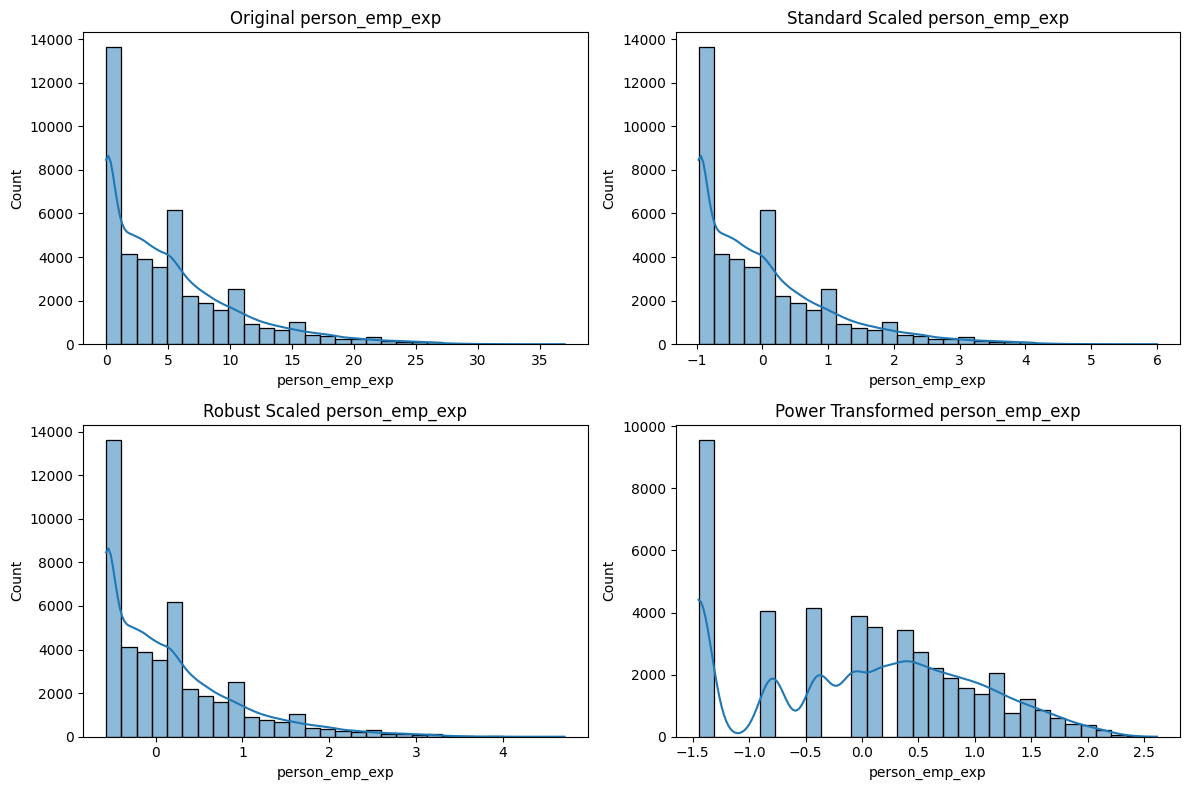

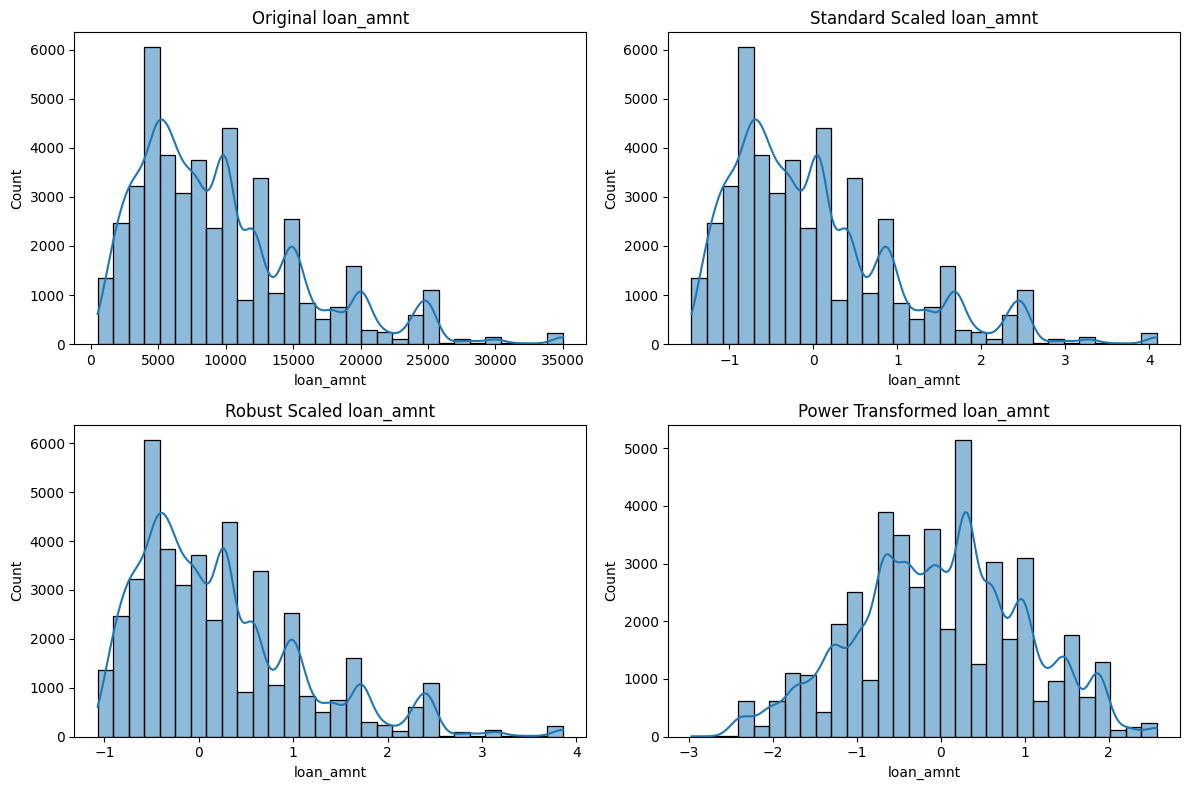

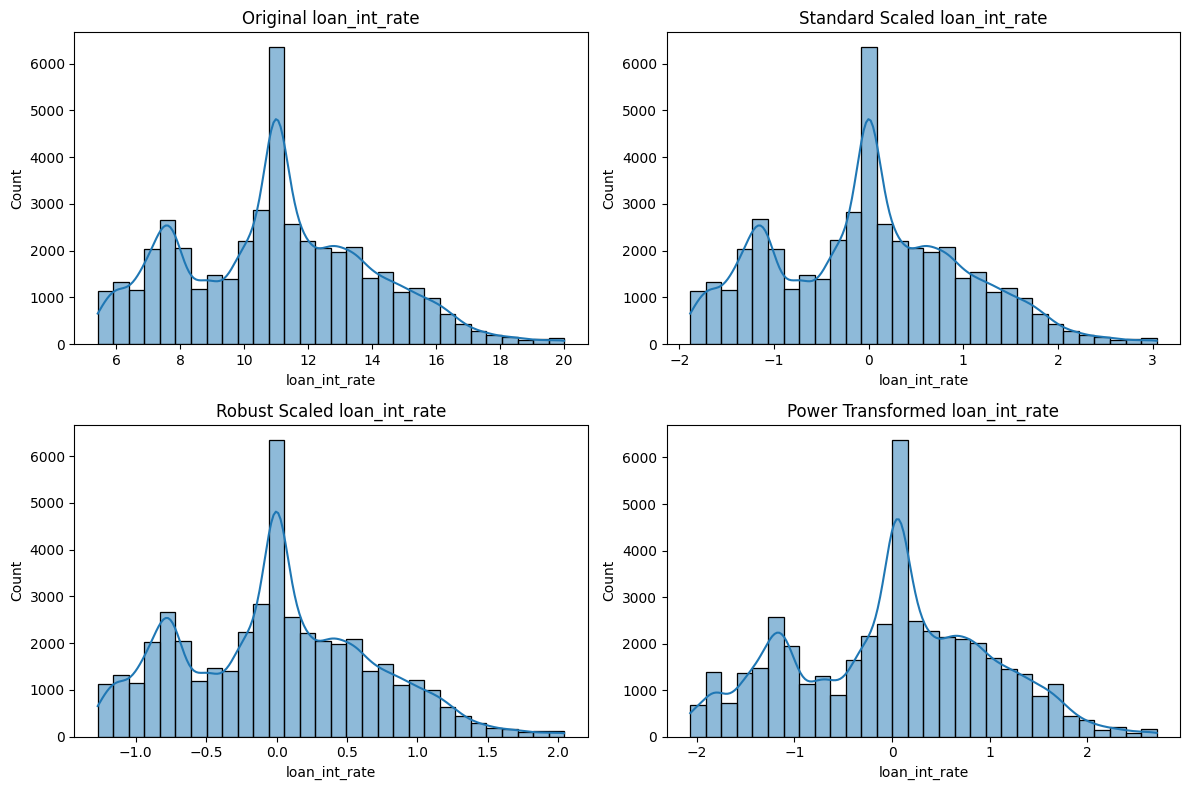

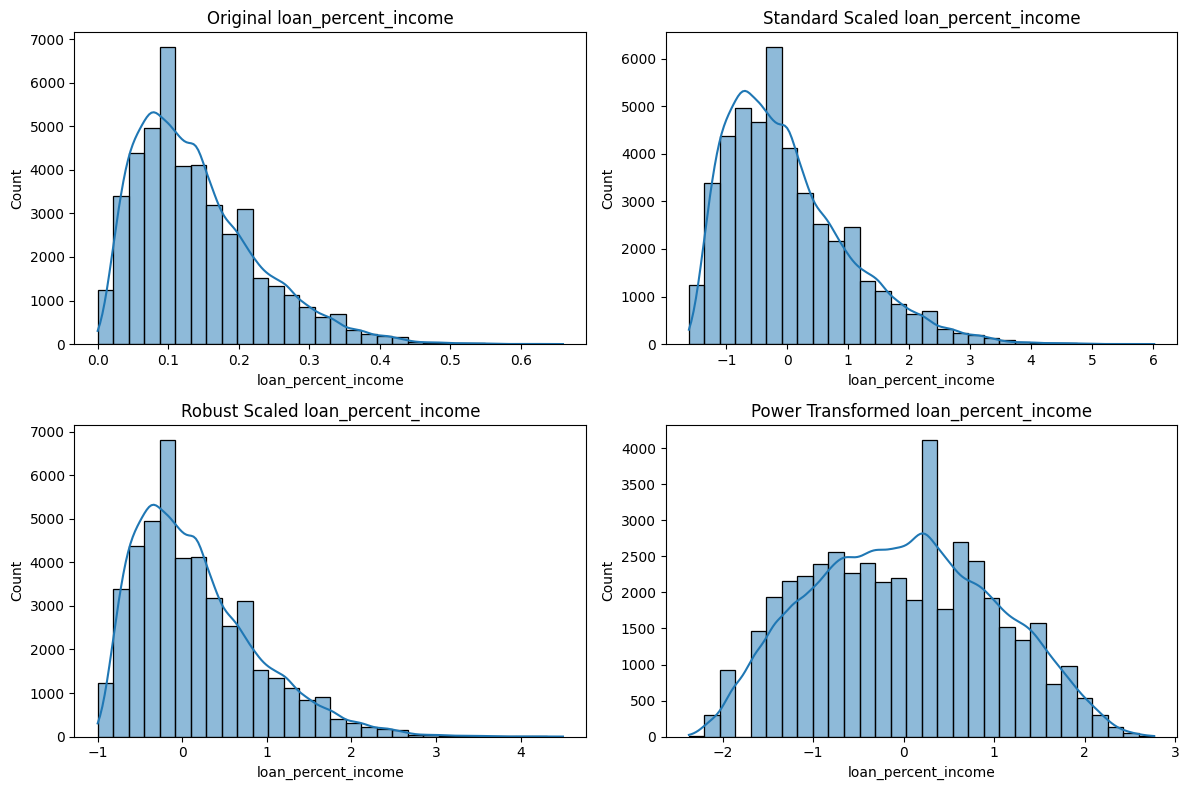

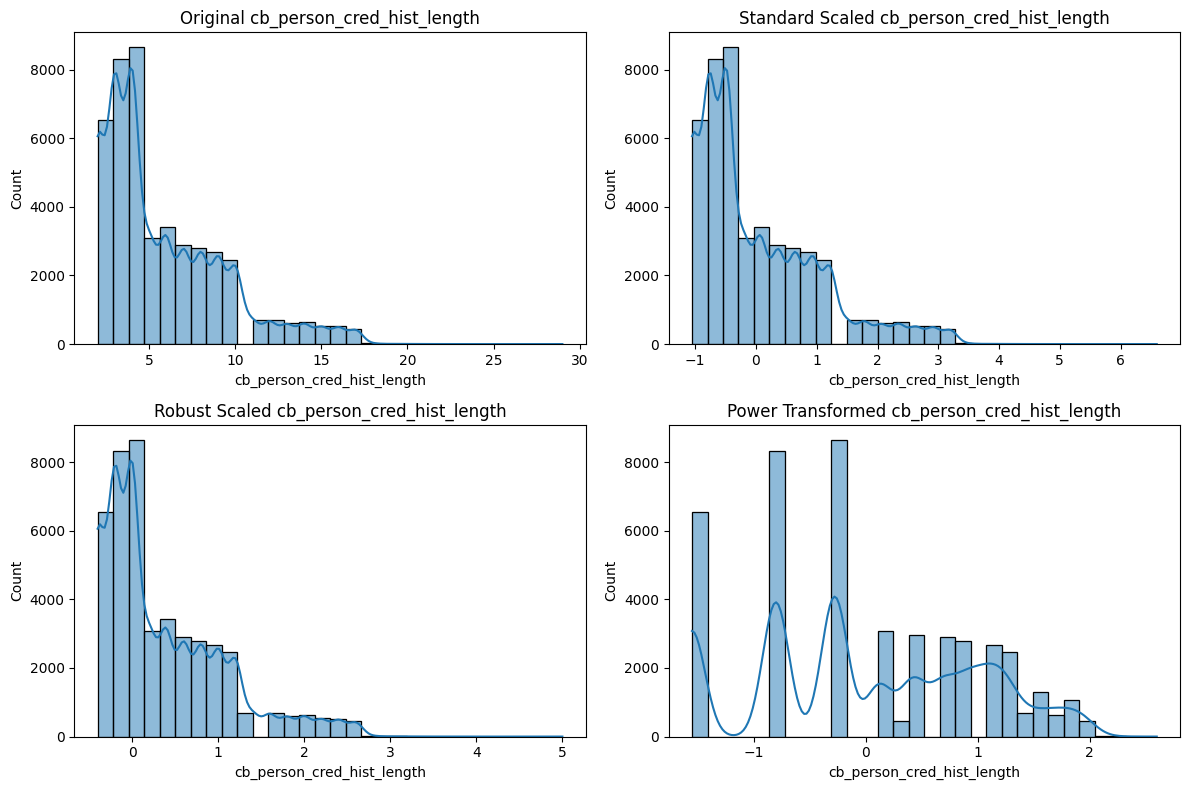

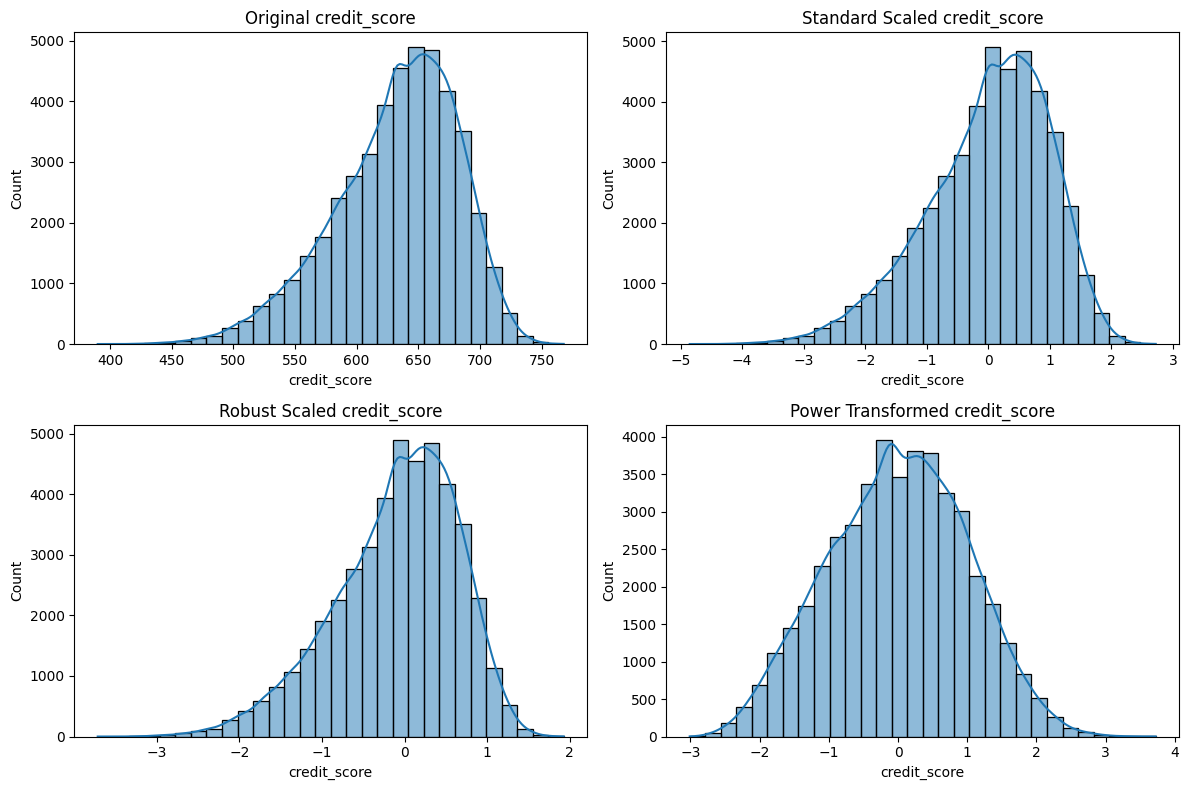

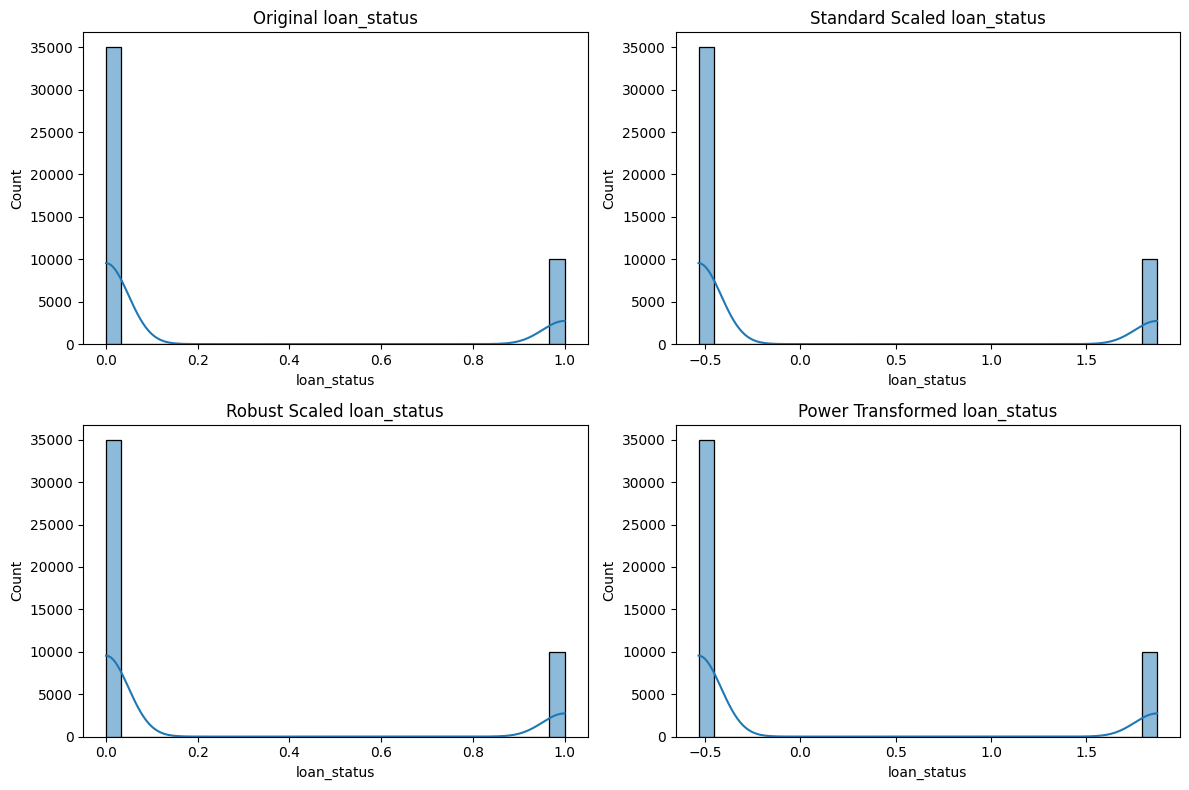

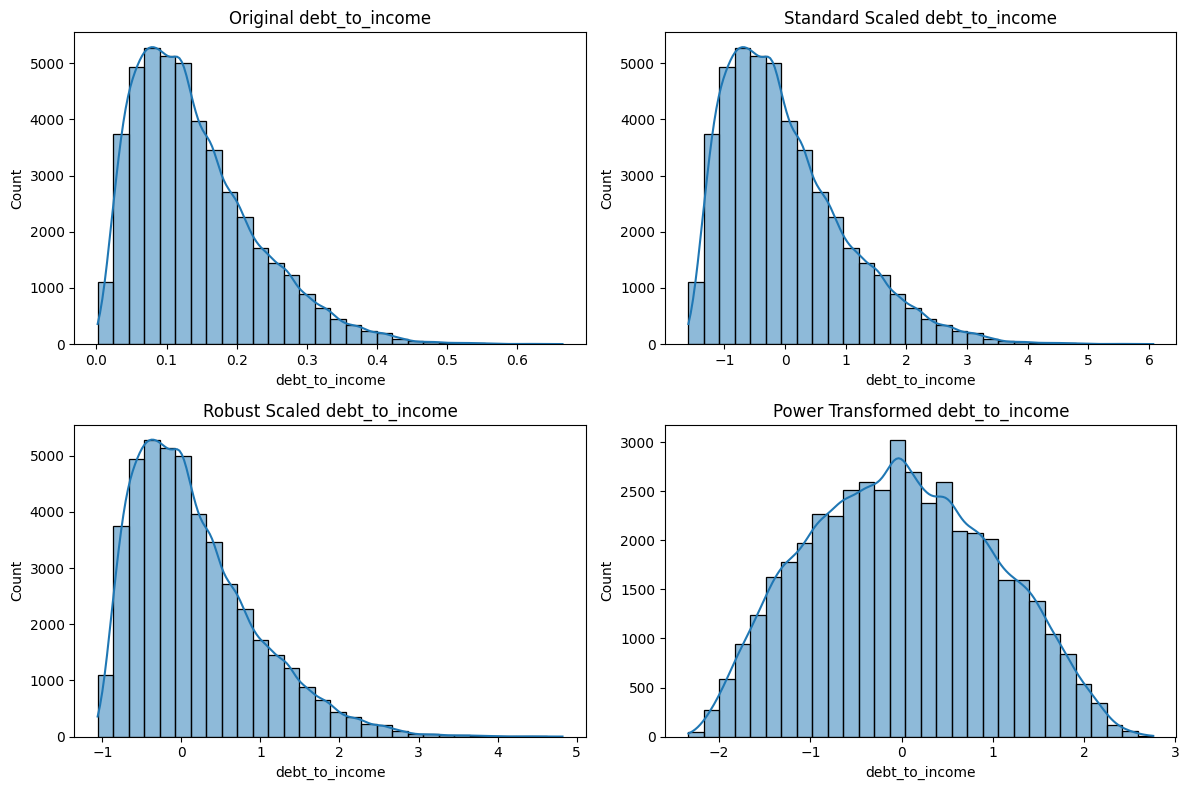

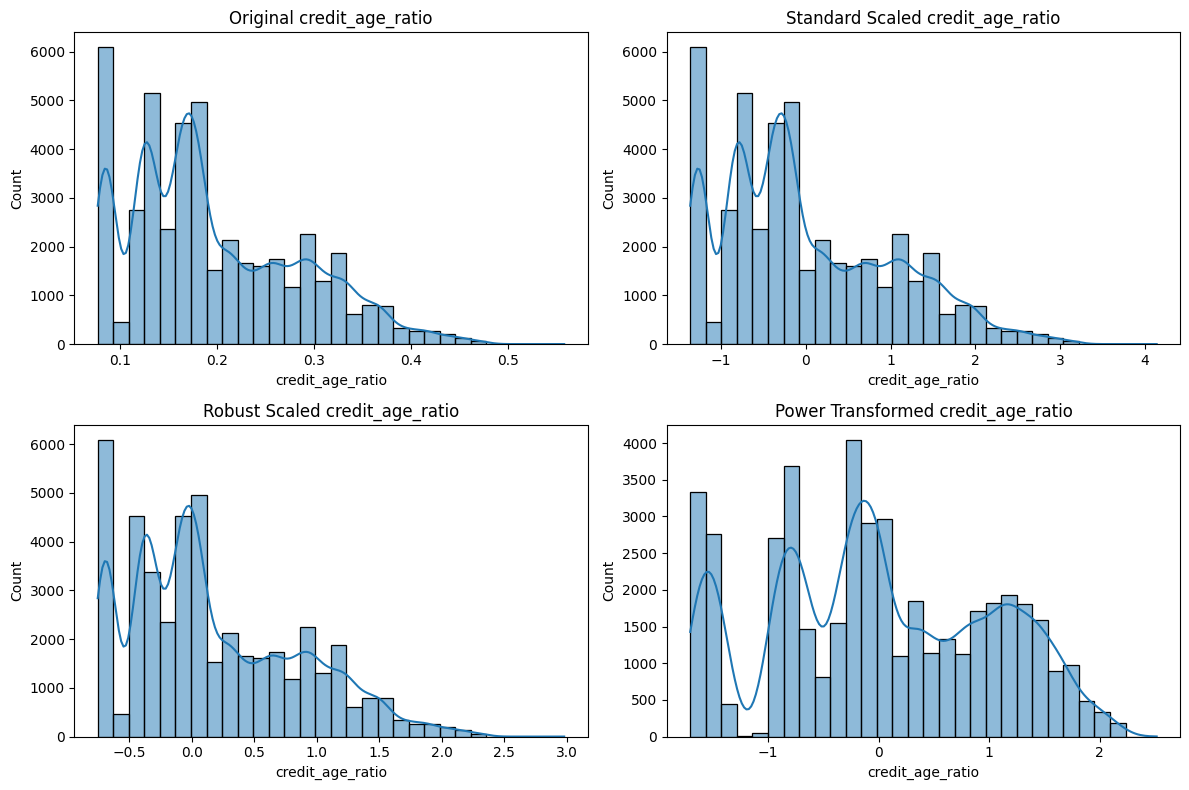

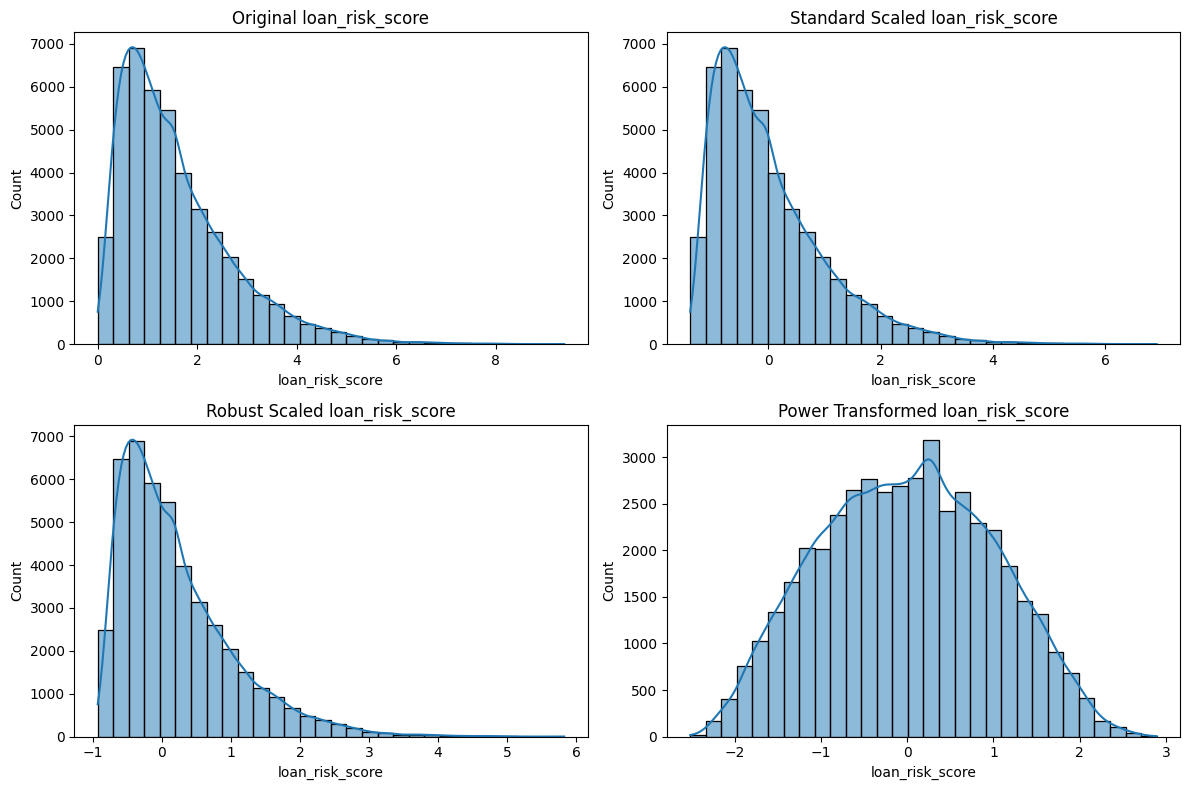

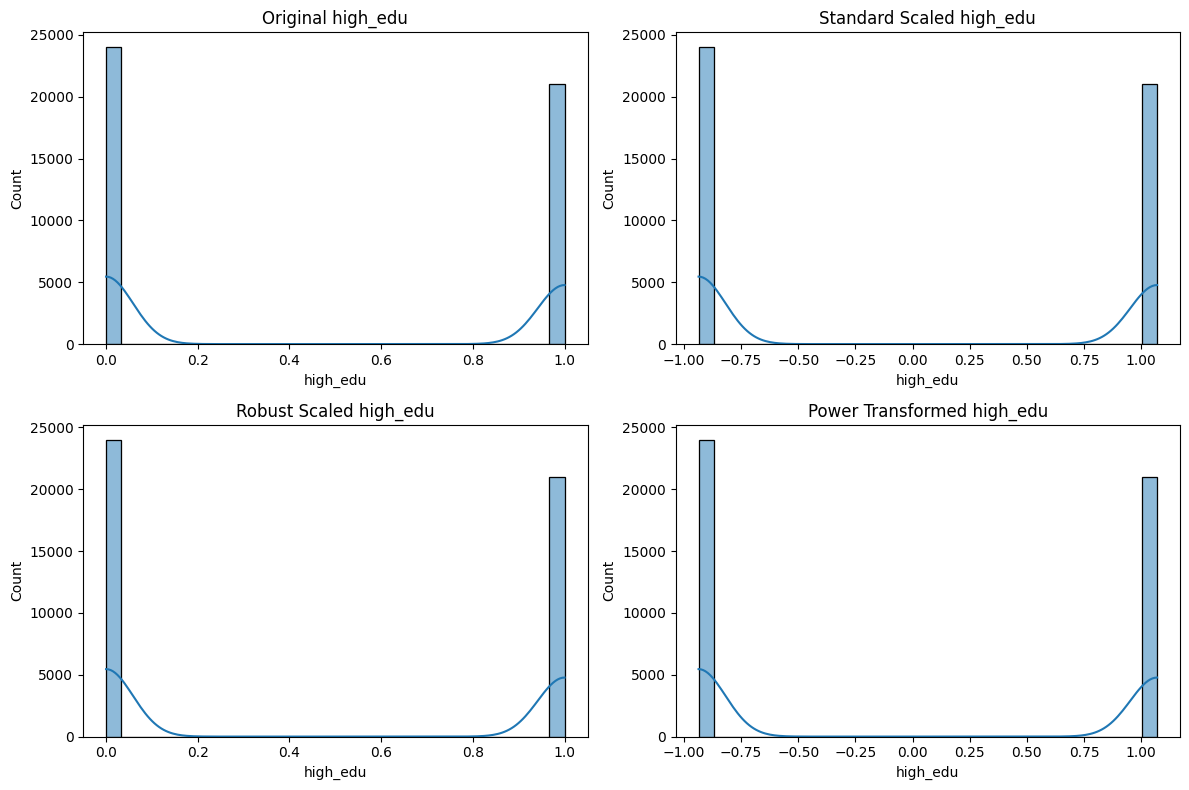

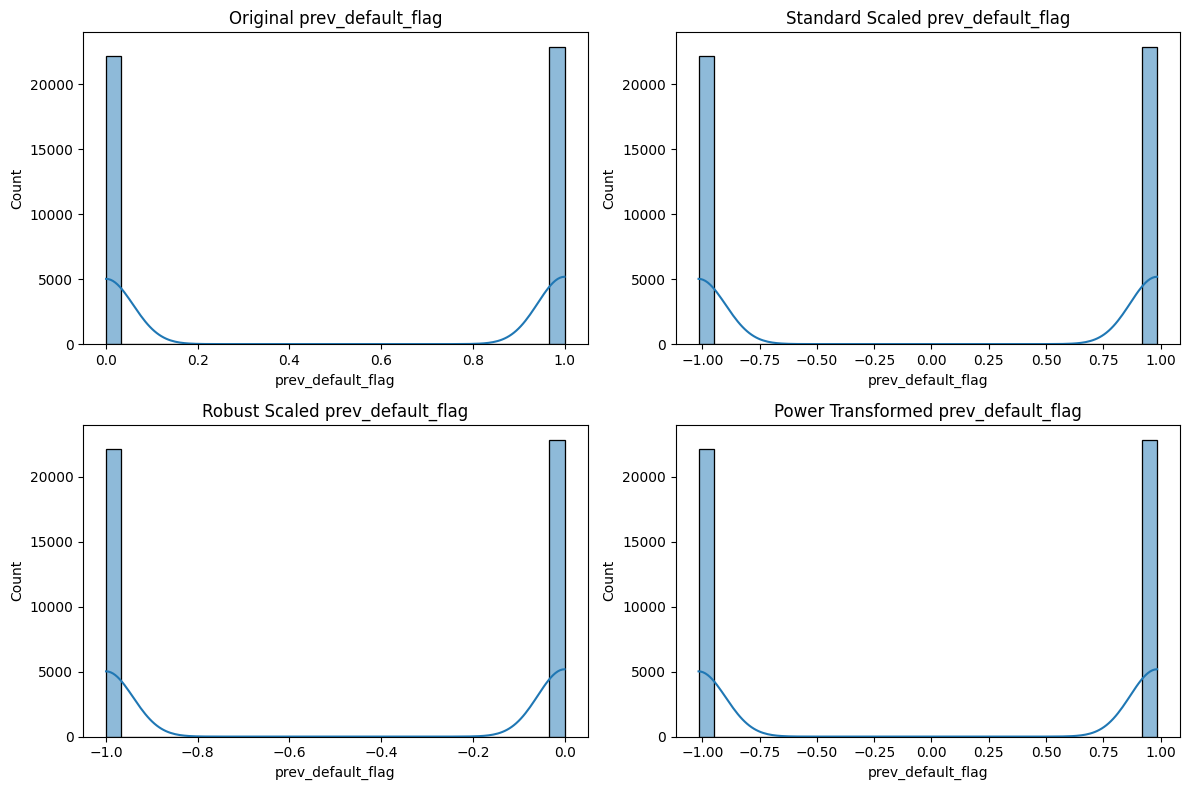

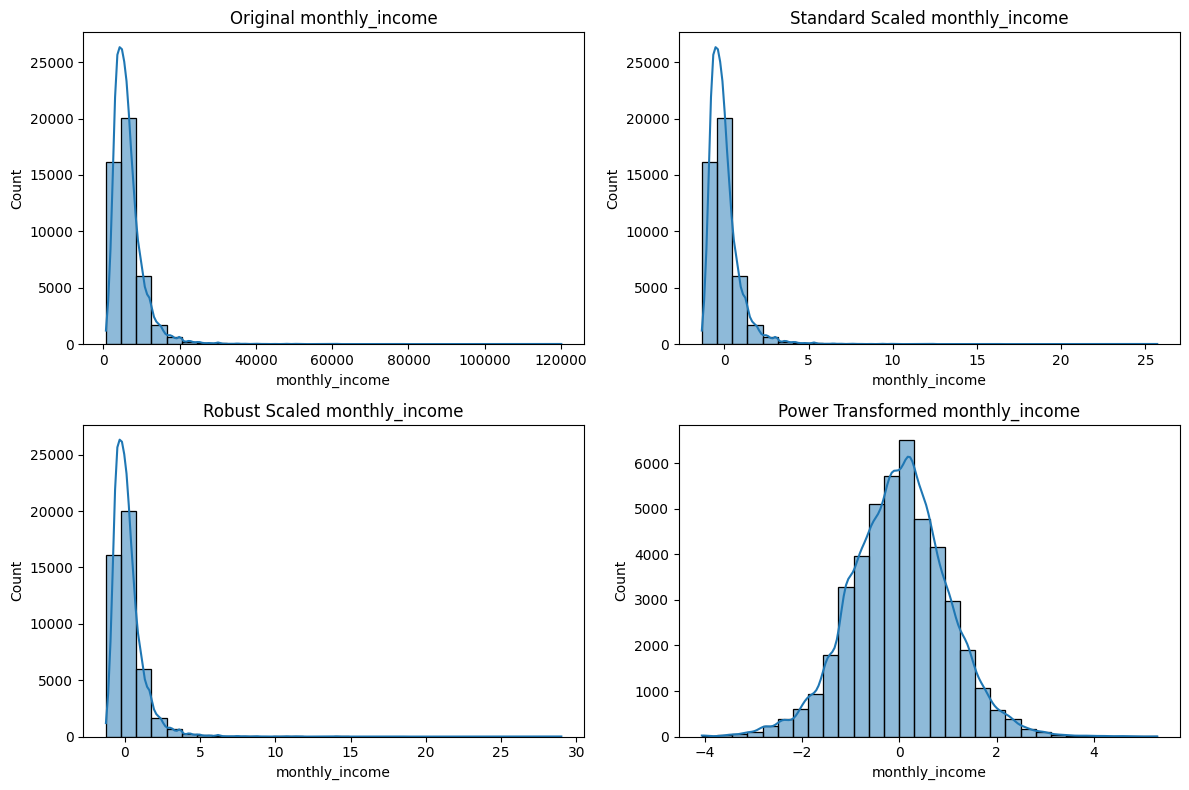

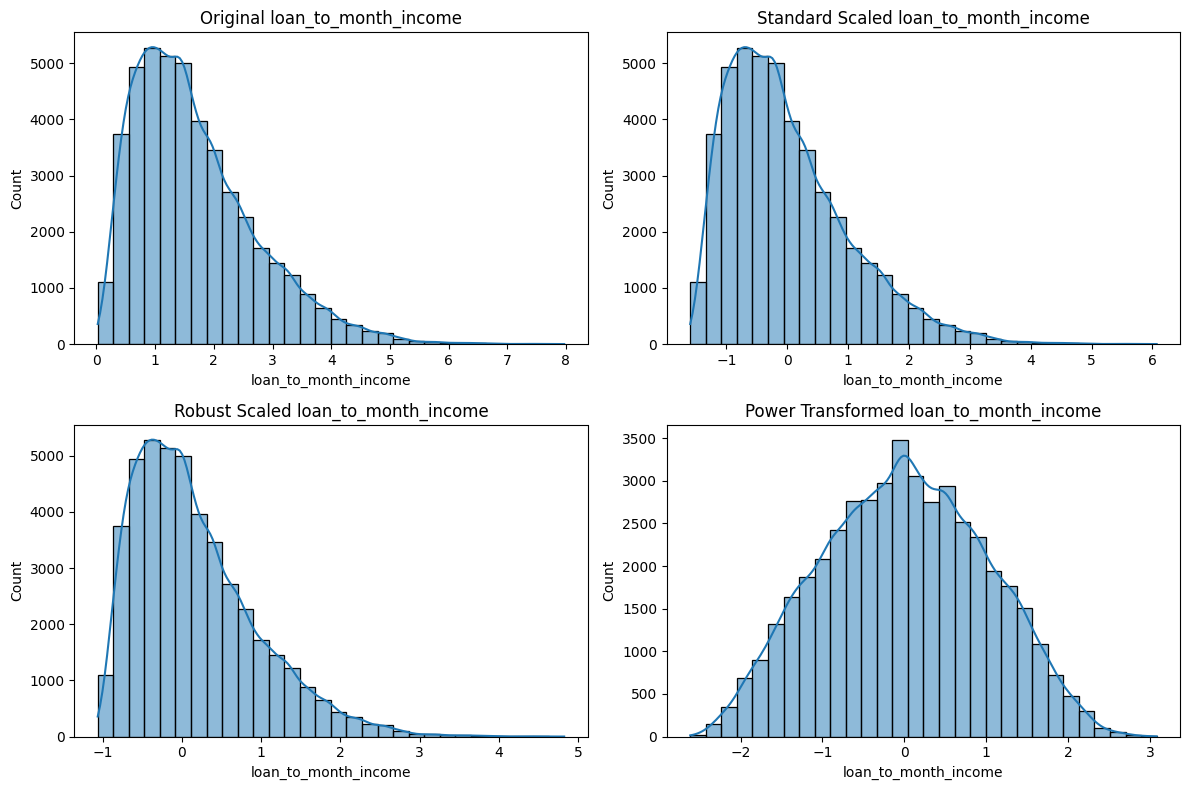

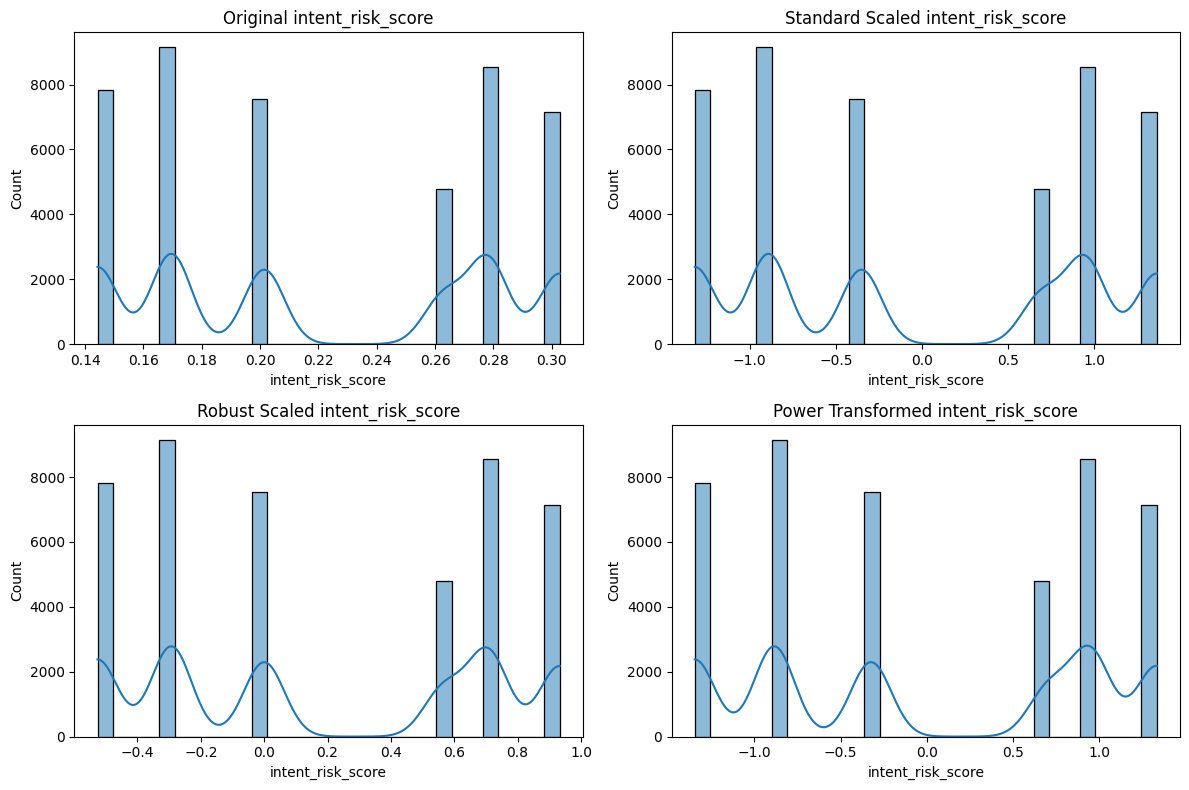

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in numarical:
  fig, axes = plt.subplots(2, 2, figsize=(12,8))

  sns.histplot(df[col], bins=30, ax=axes[0,0], kde=True)
  axes[0,0].set_title(f"Original {col}")

  sns.histplot(  df_standard_scaled[col], bins=30, ax=axes[0,1], kde=True)
  axes[0,1].set_title(f"Standard Scaled {col}")

  sns.histplot(
  df_robust_scaled[col], bins=30, ax=axes[1,0], kde=True)
  axes[1,0].set_title(f"Robust Scaled {col}")

  sns.histplot(df_power_scaled[col], bins=30, ax=axes[1,1], kde=True)
  axes[1,1].set_title(f"Power Transformed {col}")

  plt.tight_layout()
  plt.show()

In [ ]:
df_power_scaled.drop(columns=['loan_status'],inplace=True)


In [ ]:
# تحديد الأعمدة الغير موجودة في df_power_scaled
other_cols = [col for col in df.columns if col not in df_power_scaled.columns]

# دمج الأعمدة العددية المحوّلة مع باقي الأعمدة
df_new = pd.concat(
    [df_power_scaled, df[other_cols]],
    axis=1
)



In [ ]:
len(df.columns)

22

In [ ]:
len(df_new.columns)

22

In [ ]:
df=df_new.copy()

Scaling and Final Dataset Preparation Summary

We applied three different scaling methods on the numerical features:

StandardScaler

RobustScaler

PowerTransformer (Yeo–Johnson) — chosen for the final dataset because it handles skewed distributions more effectively and supports zero and negative values.

After visualizing the distributions before and after scaling, the PowerTransformer version was selected.

To build the final dataset:

All numerical columns were transformed using PowerTransformer.

Columns that were not transformed were added back from the original dataframe.

The final merged dataset is stored in df_new, which contains:

Power-transformed numerical features

Original categorical and target columns

This ensures that the dataset is fully prepared and ready for the modeling stage.

# ENCODER _FEATURE

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

f_encoded = df.copy()

for col in df.select_dtypes(include=['object', 'string', 'category']).columns:


    dummies = pd.get_dummies(df[col], prefix=col)


    df = pd.concat([df.drop(col, axis=1), dummies], axis=1)

df.head()


person_age  person_income  person_emp_exp  loan_amnt  loan_int_rate  \
0   -1.429149       0.128671       -1.448918   2.572531       1.612564   
1   -1.912954      -3.214589       -1.448918  -2.405954       0.101344   
2   -0.333247      -3.189907       -0.086152  -0.539935       0.662810   
3   -1.011781       0.316548       -1.448918   2.572531       1.382059   
4   -0.649500      -0.025565       -0.793264   2.572531       1.095325   

   loan_percent_income  cb_person_cred_hist_length  credit_score  \
0             2.414950                   -0.804405     -1.381941   
1            -0.667218                   -1.554229     -2.113221   
2             2.261497                   -0.804405     -0.057057   
3             2.261497                   -1.554229      0.870212   
4             2.518402                   -0.279306     -0.986094   

   debt_to_income  credit_age_ratio  ...  loan_intent_EDUCATION  \
0        2.395615         -0.637895  ...                  False   
1       -0.641064         -1.344188  ...                   True   
2        2.261713         -0.903228  ...                  False   
3        2.250642         -1.503264  ...                  False   
4        2.505031         -0.194746  ...                  False   

   loan_intent_HOMEIMPROVEMENT  loan_intent_MEDICAL  loan_intent_PERSONAL  \
0                        False                False                  True   
1                        False                False                 False   
2                        False                 True                 False   
3                        False                 True                 False   
4                        False                 True                 False   

   loan_intent_VENTURE  age_group_18-25  age_group_26-35  age_group_36-45  \
0                False             True            False            False   
1                False             True            False            False   
2                False             True            False            False   
3                False             True            False            False   
4                False             True            False            False   

   age_group_46-55  age_group_56+  
0            False          False  
1            False          False  
2            False          False  
3            False          False  
4            False          False  

[5 rows x 39 columns]

Encoding Categorical Columns

Loop through all categorical (object, string, category) columns in the dataset.

Each column is encoded using OneHotEncoder by applying pd.get_dummies, regardless of the number of unique values.

The original categorical column is dropped and replaced with the generated OneHot-encoded columns.

The dataset df is updated directly with the encoded columns.

# FEATURE_SELECION

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_income                   45000 non-null  float64
 2   person_emp_exp                  45000 non-null  float64
 3   loan_amnt                       45000 non-null  float64
 4   loan_int_rate                   45000 non-null  float64
 5   loan_percent_income             45000 non-null  float64
 6   cb_person_cred_hist_length      45000 non-null  float64
 7   credit_score                    45000 non-null  float64
 8   debt_to_income                  45000 non-null  float64
 9   credit_age_ratio                45000 non-null  float64
 10  loan_risk_score                 45000 non-null  float64
 11  high_edu                        45000 non-null  float64
 12  prev_default_flag               

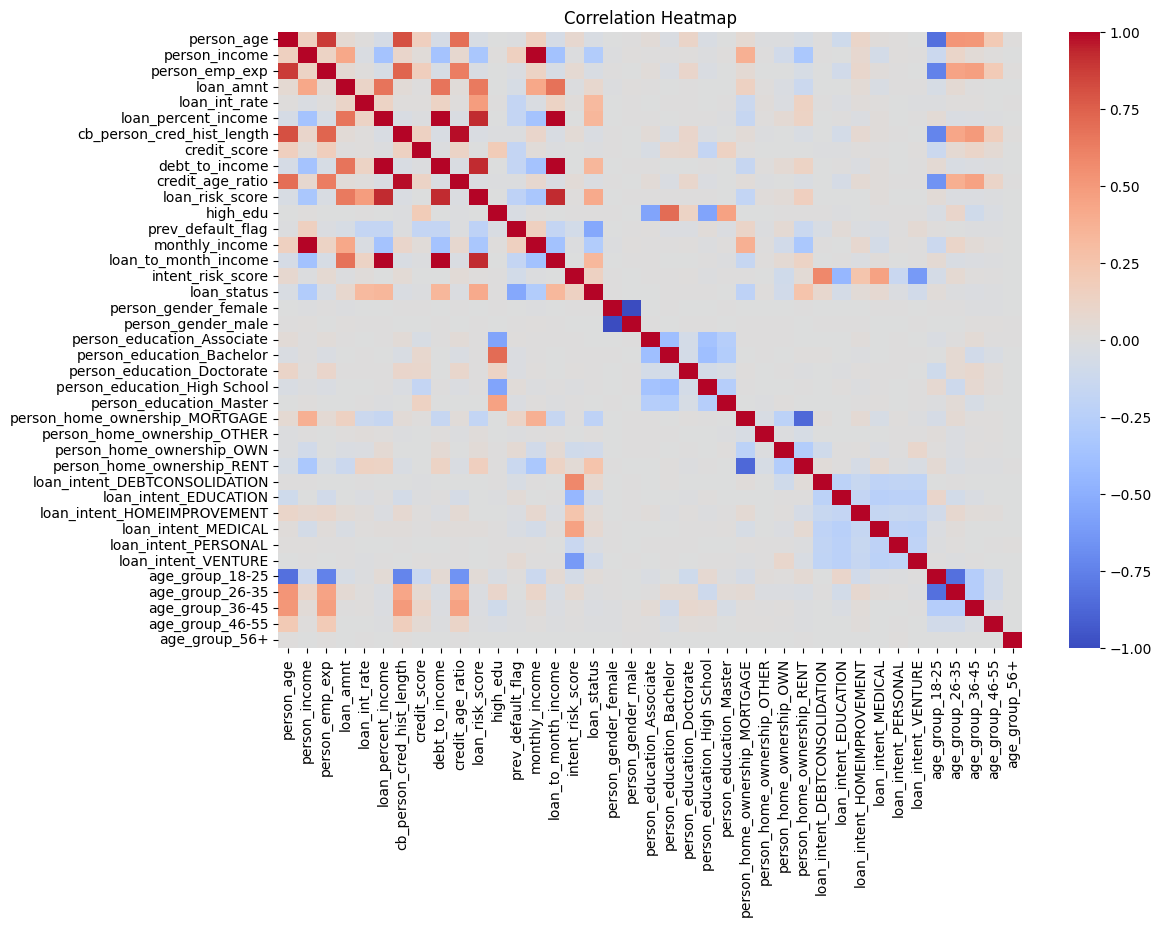

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:

corr = df.corr(numeric_only=True)['loan_status'].abs().sort_values(ascending=False)


top20_corr_features = corr.drop('loan_status').head(20)


top20_features_list = top20_corr_features.index.tolist()

print(top20_features_list)


['prev_default_flag', 'loan_risk_score', 'loan_percent_income', 'debt_to_income', 'loan_to_month_income', 'loan_int_rate', 'monthly_income', 'person_income', 'person_home_ownership_RENT', 'person_home_ownership_MORTGAGE', 'intent_risk_score', 'person_home_ownership_OWN', 'loan_intent_VENTURE', 'loan_amnt', 'loan_intent_DEBTCONSOLIDATION', 'loan_intent_MEDICAL', 'loan_intent_EDUCATION', 'person_age', 'loan_intent_HOMEIMPROVEMENT', 'person_emp_exp']


In [ ]:
from sklearn.feature_selection import mutual_info_classif


data_mi = df.copy()

X = data_mi.drop(columns=['loan_status'])
y = data_mi['loan_status']



mi_scores = mutual_info_classif(X, y, random_state=42)


mi_scores = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)


top20_mi_features = mi_scores.head(20)
top20_mi_features_list = top20_mi_features.index.tolist()


print("Top 20 Features by Mutual Information:\n")
print(top20_mi_features)

Top 20 Features by Mutual Information:

prev_default_flag                 0.195023
loan_risk_score                   0.128503
debt_to_income                    0.091308
loan_to_month_income              0.091027
monthly_income                    0.090591
person_income                     0.090574
loan_percent_income               0.081941
loan_int_rate                     0.068952
person_home_ownership_RENT        0.038637
person_home_ownership_MORTGAGE    0.029767
loan_amnt                         0.017476
intent_risk_score                 0.014615
person_home_ownership_OWN         0.008395
age_group_26-35                   0.006410
age_group_18-25                   0.006317
loan_intent_VENTURE               0.004876
high_edu                          0.004247
loan_intent_DEBTCONSOLIDATION     0.004121
person_education_Master           0.003567
person_gender_female              0.003421
dtype: float64


/tmp/ipython-input-1691777504.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")


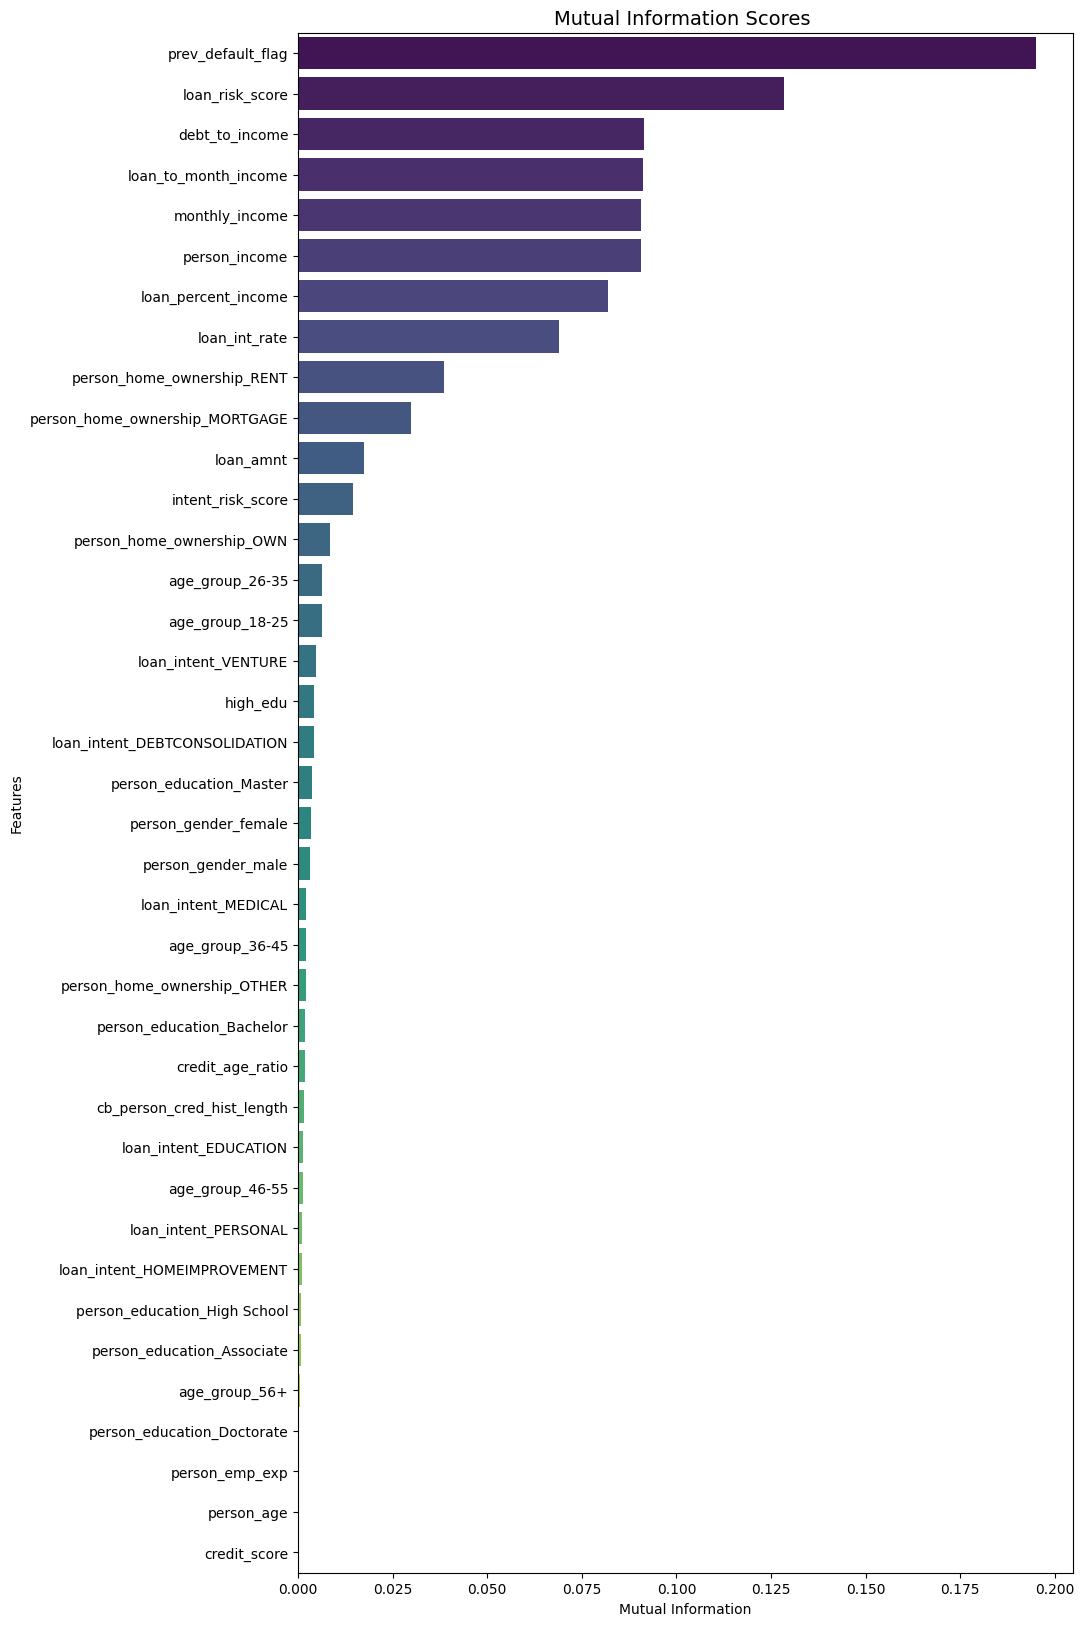

In [ ]:
plt.figure(figsize=(10,20))
sns.barplot(x=mi_scores, y=mi_scores.index, palette="viridis")
plt.title("Mutual Information Scores ", fontsize=14)
plt.xlabel("Mutual Information")
plt.ylabel("Features")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt

X = df.drop(columns=['loan_status'])
y = df['loan_status']


rf_model = RandomForestRegressor(n_estimators=200, random_state=42)
rf_model.fit(X, y)


importances = rf_model.feature_importances_
rf_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)

top20_rf_features = rf_importances.head(20)
top20_rf_features_list = top20_rf_features.index.tolist()

print("Top 20 Features by Random Forest Importance:\n")
print(top20_rf_features)

Top 20 Features by Random Forest Importance:

prev_default_flag               0.296099
loan_risk_score                 0.148139
loan_int_rate                   0.121151
monthly_income                  0.056150
person_income                   0.054486
credit_score                    0.045869
person_home_ownership_RENT      0.041307
loan_to_month_income            0.036483
debt_to_income                  0.035355
intent_risk_score               0.026696
credit_age_ratio                0.024539
loan_amnt                       0.020058
person_age                      0.015894
person_emp_exp                  0.014960
cb_person_cred_hist_length      0.007396
loan_intent_HOMEIMPROVEMENT     0.006676
person_home_ownership_OWN       0.005849
loan_percent_income             0.005033
person_education_Associate      0.003289
person_education_High School    0.003201
dtype: float64


/tmp/ipython-input-3948373370.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_importances.head(20), y=rf_importances.head(20).index, palette="crest")


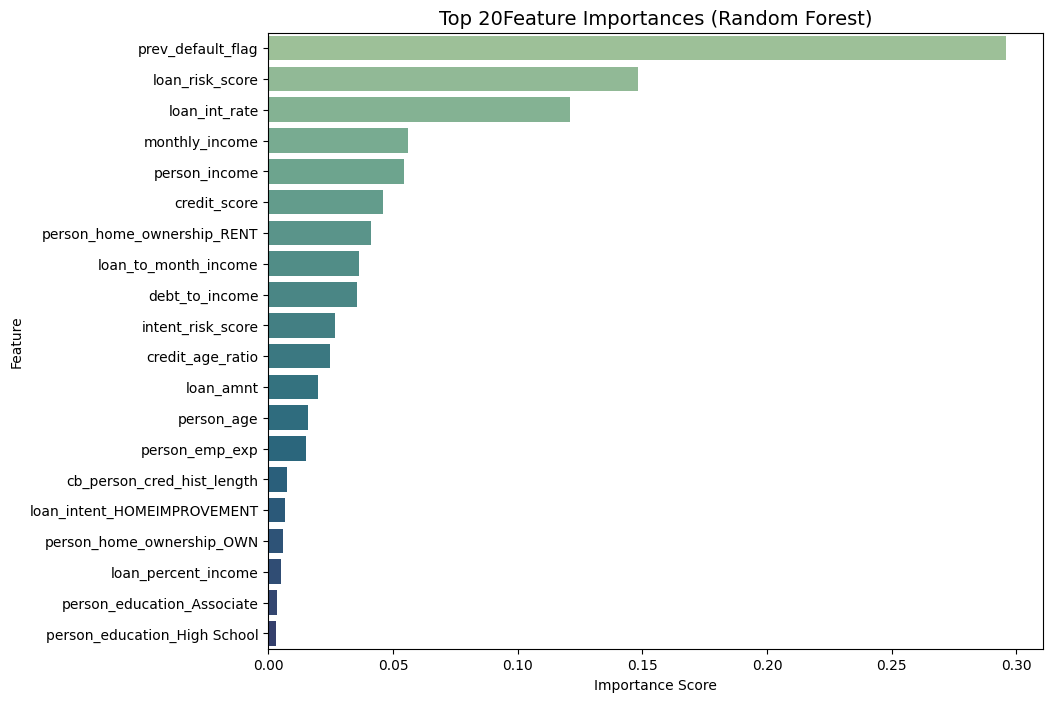

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=rf_importances.head(20), y=rf_importances.head(20).index, palette="crest")
plt.title("Top 20Feature Importances (Random Forest)", fontsize=14)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import pandas as pd

X = data_mi.drop(columns=['loan_status'])
y = data_mi['loan_status']

model = LinearRegression()

rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)

# Create a summary DataFrame
rfe_results = pd.DataFrame({
    "Feature": X.columns,
    "Selected": rfe.support_,
    "Ranking": rfe.ranking_
}).sort_values(by="Ranking")

rfe_results


Feature  Selected  Ranking
1                    person_income      True        1
3                        loan_amnt      True        1
5              loan_percent_income      True        1
4                    loan_int_rate      True        1
12               prev_default_flag      True        1
13                  monthly_income      True        1
14            loan_to_month_income      True        1
10                 loan_risk_score      True        1
25       person_home_ownership_OWN      True        1
37                   age_group_56+      True        1
8                   debt_to_income     False        2
33                 age_group_18-25     False        3
34                 age_group_26-35     False        4
35                 age_group_36-45     False        5
36                 age_group_46-55     False        6
26      person_home_ownership_RENT     False        7
24     person_home_ownership_OTHER     False        8
15               intent_risk_score     False        9
7                     credit_score     False       10
29     loan_intent_HOMEIMPROVEMENT     False       11
27   loan_intent_DEBTCONSOLIDATION     False       12
23  person_home_ownership_MORTGAGE     False       13
20      person_education_Doctorate     False       14
28           loan_intent_EDUCATION     False       15
30             loan_intent_MEDICAL     False       16
31            loan_intent_PERSONAL     False       17
6       cb_person_cred_hist_length     False       18
9                 credit_age_ratio     False       19
32             loan_intent_VENTURE     False       20
2                   person_emp_exp     False       21
0                       person_age     False       22
19       person_education_Bachelor     False       23
22         person_education_Master     False       24
11                        high_edu     False       25
18      person_education_Associate     False       26
21    person_education_High School     False       27
16            person_gender_female     False       28
17              person_gender_male     False       29

In [ ]:
top_20_rfe_features = rfe_results[rfe_results['Ranking'] <= 20]['Feature'].tolist()

print("Top 20 features by RFE:")
print(top_20_rfe_features)


Top 20 features by RFE:
['person_income', 'loan_amnt', 'loan_percent_income', 'loan_int_rate', 'prev_default_flag', 'monthly_income', 'loan_to_month_income', 'loan_risk_score', 'person_home_ownership_OWN', 'age_group_56+', 'debt_to_income', 'age_group_18-25', 'age_group_26-35', 'age_group_36-45', 'age_group_46-55', 'person_home_ownership_RENT', 'person_home_ownership_OTHER', 'intent_risk_score', 'credit_score', 'loan_intent_HOMEIMPROVEMENT', 'loan_intent_DEBTCONSOLIDATION', 'person_home_ownership_MORTGAGE', 'person_education_Doctorate', 'loan_intent_EDUCATION', 'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'cb_person_cred_hist_length', 'credit_age_ratio', 'loan_intent_VENTURE']


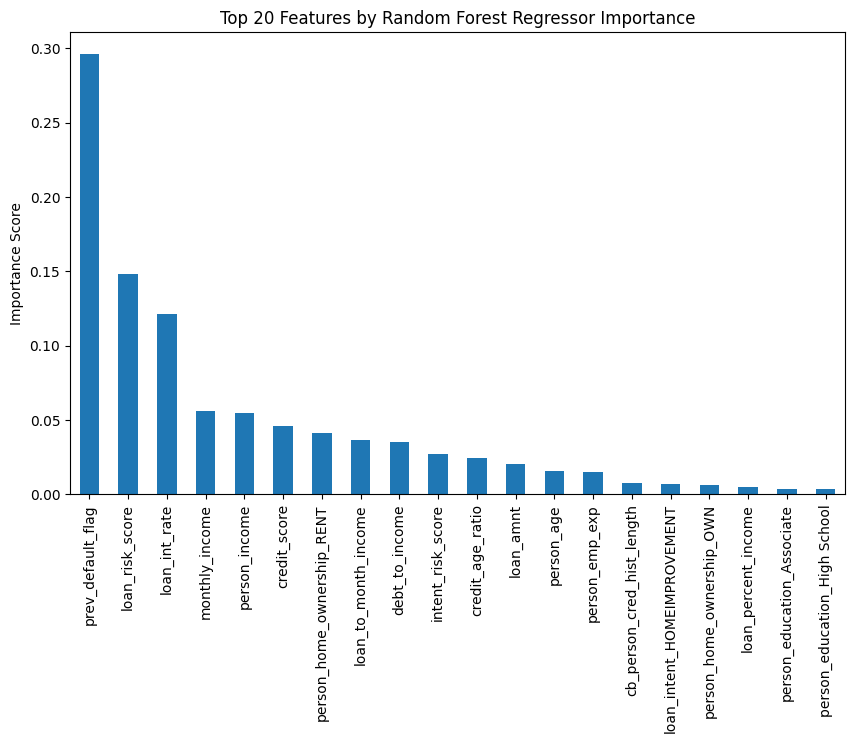

In [ ]:

plt.figure(figsize=(10,6))
rf_importances.head(20).plot(kind='bar')
plt.title("Top 20 Features by Random Forest Regressor Importance")
plt.ylabel("Importance Score")
plt.show()

In [ ]:
# Put all feature lists into a dictionary for easy comparison
feature_methods = {
    "Correlation": set(top20_features_list ) ,
    "Mutual_Information": set(top20_mi_features_list),
    "RFE": set(top_20_rfe_features),
    "Random_Forest": set(top_20_rfe_features)

}

# Combine all features into one unified set
all_features = set().union(*feature_methods.values())

# Create a DataFrame showing which feature was selected by which method
comparison_table = pd.DataFrame(index=sorted(all_features))
for method, features in feature_methods.items():
    comparison_table[method] = comparison_table.index.isin(features)

# Count how many methods selected each feature
comparison_table["Selected_By"] = comparison_table.sum(axis=1)

# Sort by frequency (most consistent features at top)
comparison_table = comparison_table.sort_values(by="Selected_By", ascending=False)

# Display comparison table
comparison_table


Correlation  Mutual_Information    RFE  \
loan_int_rate                          True                True   True   
debt_to_income                         True                True   True   
person_home_ownership_MORTGAGE         True                True   True   
person_income                          True                True   True   
loan_amnt                              True                True   True   
intent_risk_score                      True                True   True   
loan_intent_DEBTCONSOLIDATION          True                True   True   
loan_risk_score                        True                True   True   
person_home_ownership_OWN              True                True   True   
prev_default_flag                      True                True   True   
loan_to_month_income                   True                True   True   
loan_intent_VENTURE                    True                True   True   
person_home_ownership_RENT             True                True   True   
monthly_income                         True                True   True   
loan_percent_income                    True                True   True   
age_group_18-25                       False                True   True   
age_group_26-35                       False                True   True   
loan_intent_MEDICAL                    True               False   True   
loan_intent_EDUCATION                  True               False   True   
loan_intent_HOMEIMPROVEMENT            True               False   True   
age_group_56+                         False               False   True   
age_group_36-45                       False               False   True   
cb_person_cred_hist_length            False               False   True   
credit_age_ratio                      False               False   True   
credit_score                          False               False   True   
age_group_46-55                       False               False   True   
person_education_Doctorate            False               False   True   
loan_intent_PERSONAL                  False               False   True   
person_home_ownership_OTHER           False               False   True   
high_edu                              False                True  False   
person_education_Master               False                True  False   
person_age                             True               False  False   
person_emp_exp                         True               False  False   
person_gender_female                  False                True  False   

                                Random_Forest  Selected_By  
loan_int_rate                            True            4  
debt_to_income                           True            4  
person_home_ownership_MORTGAGE           True            4  
person_income                            True            4  
loan_amnt                                True            4  
intent_risk_score                        True            4  
loan_intent_DEBTCONSOLIDATION            True            4  
loan_risk_score                          True            4  
person_home_ownership_OWN                True            4  
prev_default_flag                        True            4  
loan_to_month_income                     True            4  
loan_intent_VENTURE                      True            4  
person_home_ownership_RENT               True            4  
monthly_income                           True            4  
loan_percent_income                      True            4  
age_group_18-25                          True            3  
age_group_26-35                          True            3  
loan_intent_MEDICAL                      True            3  
loan_intent_EDUCATION                    True            3  
loan_intent_HOMEIMPROVEMENT              True            3  
age_group_56+                            True            2  
age_group_36-45                          True            2  
cb_person_cred_hist_length            

In [ ]:
# Automatically select features that appear in at least 2 methods
final_selected_features = comparison_table[comparison_table["Selected_By"] >
 2].index.tolist()

# Display results
print("Final Consensus Features (selected by three or more methods):\n")
for i, feature in enumerate(final_selected_features, start=1):
    print(f"{i}. {feature}")

Final Consensus Features (selected by three or more methods):

1. loan_int_rate
2. debt_to_income
3. person_home_ownership_MORTGAGE
4. person_income
5. loan_amnt
6. intent_risk_score
7. loan_intent_DEBTCONSOLIDATION
8. loan_risk_score
9. person_home_ownership_OWN
10. prev_default_flag
11. loan_to_month_income
12. loan_intent_VENTURE
13. person_home_ownership_RENT
14. monthly_income
15. loan_percent_income
16. age_group_18-25
17. age_group_26-35
18. loan_intent_MEDICAL
19. loan_intent_EDUCATION
20. loan_intent_HOMEIMPROVEMENT


In [ ]:
data = df[final_selected_features + ['loan_status']]
data.head()

loan_int_rate  debt_to_income  person_home_ownership_MORTGAGE  \
0       1.612564        2.395615                           False   
1       0.101344       -0.641064                           False   
2       0.662810        2.261713                            True   
3       1.382059        2.250642                           False   
4       1.095325        2.505031                           False   

   person_income  loan_amnt  intent_risk_score  loan_intent_DEBTCONSOLIDATION  \
0       0.128671   2.572531          -0.323076                          False   
1      -3.214589  -2.405954          -0.884648                          False   
2      -3.189907  -0.539935           0.951040                          False   
3       0.316548   2.572531           0.951040                          False   
4      -0.025565   2.572531           0.951040                          False   

   loan_risk_score  person_home_ownership_OWN  prev_default_flag  ...  \
0         2.662837                      False          -1.016040  ...   
1        -0.503834                       True           0.984213  ...   
2         2.218934                      False          -1.016040  ...   
3         2.451829                      False          -1.016040  ...   
4         2.613922                      False          -1.016040  ...   

   loan_intent_VENTURE  person_home_ownership_RENT  monthly_income  \
0                False                        True        0.128681   
1                False                       False       -3.214359   
2                False                       False       -3.189686   
3                False                        True        0.316564   
4                False                        True       -0.025559   

   loan_percent_income  age_group_18-25  age_group_26-35  loan_intent_MEDICAL  \
0             2.414950             True            False                False   
1            -0.667218             True            False                False   
2             2.261497             True            False                 True   
3             2.261497             True            False                 True   
4             2.518402             True            False                 True   

   loan_intent_EDUCATION  loan_intent_HOMEIMPROVEMENT  loan_status  
0                  False                        False            1  
1                   True                        False            0  
2                  False                        False            1  
3                  False                        False            1  
4                  False                        False            1  

[5 rows x 21 columns]

In [ ]:
data.shape

(45000, 21)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   loan_int_rate                   45000 non-null  float64
 1   debt_to_income                  45000 non-null  float64
 2   person_home_ownership_MORTGAGE  45000 non-null  bool   
 3   person_income                   45000 non-null  float64
 4   loan_amnt                       45000 non-null  float64
 5   intent_risk_score               45000 non-null  float64
 6   loan_intent_DEBTCONSOLIDATION   45000 non-null  bool   
 7   loan_risk_score                 45000 non-null  float64
 8   person_home_ownership_OWN       45000 non-null  bool   
 9   prev_default_flag               45000 non-null  float64
 10  loan_to_month_income            45000 non-null  float64
 11  loan_intent_VENTURE             45000 non-null  bool   
 12  person_home_ownership_RENT      

## Feature Selection Summary

In this project, four different feature selection methods were applied to identify the most important predictors influencing the loan status classification task:
1. **Correlation Analysis**
2. **Mutual Information**
3. **Recursive Feature Elimination (RFE)**
4. **Random Forest Feature Importance**

A consolidated comparison table was created to show which features were selected by each method and the total number of methods that selected each feature (`Selected_By` column).

---

## 1. Features Selected by All Four Methods (4/4)

These features showed the strongest agreement and are considered the most influential predictors:
- loan_int_rate
- debt_to_income
- person_home_ownership_MORTGAGE
- person_income
- loan_amnt
- intent_risk_score
- loan_intent_DEBTCONSOLIDATION
- loan_risk_score
- person_home_ownership_OWN
- prev_default_flag
- loan_to_month_income
- loan_intent_VENTURE
- person_home_ownership_RENT
- monthly_income
- loan_percent_income

---

## 2. Features Selected by Three Methods (3/4)

These features also showed strong predictive importance:
- age_group_18-25
- age_group_26-35
- loan_intent_MEDICAL
- loan_intent_EDUCATION
- loan_intent_HOMEIMPROVEMENT

---

## 3. Features Selected by Two Methods (2/4)

These features had moderate importance:
- credit_score
- age_group_36-45
- age_group_46-55
- age_group_56+
- cb_person_cred_hist_length
- loan_intent_PERSONAL
- person_education_Doctorate
- person_home_ownership_OTHER

---

## 4. Features Selected by One Method Only (1/4)

These features have weak evidence of importance:
- high_edu
- person_age
- person_gender

---

# Final Consensus Features (Selected by ≥ 3 Methods)

These are the final selected features that were chosen by **three or more** feature selection methods and will be used in the modeling phase:

1. loan_int_rate
2. debt_to_income
3. person_home_ownership_MORTGAGE
4. person_income
5. loan_amnt
6. intent_risk_score
7. loan_intent_DEBTCONSOLIDATION
8. loan_risk_score
9. person_home_ownership_OWN
10. prev_default_flag
11. loan_to_month_income
12. loan_intent_VENTURE
13. person_home_ownership_RENT
14. monthly_income
15. loan_percent_income
16. age_group_18-25
17. age_group_26-35
18. loan_intent_MEDICAL
19. loan_intent_EDUCATION
20. loan_intent_HOMEIMPROVEMENT


# BALANCE_DATA

In [ ]:
from imblearn .over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
x = data.drop(columns=['loan_status'])
y = data['loan_status']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,stratify=y)
smote=SMOTE(random_state=42,k_neighbors=5)

X_resampled, y_resampled = smote.fit_resample(x_train, y_train)

print("Befor smote:", y_train.value_counts())
print("After smote:", y_resampled.value_counts())
data.shape


Befor smote: loan_status
0    28000
1     8000
Name: count, dtype: int64
After smote: loan_status
0    28000
1    28000
Name: count, dtype: int64


(45000, 21)

In [ ]:
train_final = pd.concat([X_resampled, y_resampled], axis=1)
train_final.to_csv("train_balanced.csv", index=False)


In [ ]:
test_final = pd.concat([x_test, y_test], axis=1)
test_final.to_csv("test_original.csv", index=False)


## Summary of the Balancing Process
After splitting the dataset into training and test sets using **stratified sampling**, the training data showed a clear class imbalance. To fix this, **SMOTE** was applied **only on the training set** to generate synthetic samples for the minority class and balance the dataset.

The **test set was left unchanged** to keep the evaluation realistic and unbiased.

At the end of the process, **two files were saved**:

1. **Balanced training file**:contains the resampled X_train and y_train after applying SMOTE.
2. **Original test file** :contains the untouched X_test and y_test.

This ensures the model is trained on balanced data, while performance is evaluated on the real distribution.
